In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#dataset_directory = '/content/drive/MyDrive/ML Pro'
dataset_directory = '/content/drive/MyDrive/ML Pro/16000_pcm_speeches'

for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#dataset_directory = '/content/drive/MyDrive/ML Pro'
os.listdir(dataset_directory)

['Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Magaret_Tarcher',
 'Nelson_Mandela',
 'other',
 '_background_noise_',
 'tf_Wav_reader.py']

In [ ]:
import os
from os.path import isfile, join
import numpy as np
import shutil
from tensorflow import keras
from pathlib import Path
from IPython.display import display, Audio
import subprocess

Preprocessing

(1)

In [ ]:
#dataset_directory = '/content/drive/MyDrive/ML Pro'

num_speakers = 0

#Ignoring the specific file..
file_to_ignore = 'tf_Wav_reader.py'

for speaker_dir in os.listdir(dataset_directory):
    if speaker_dir == file_to_ignore:
        continue
    speaker_path = os.path.join(dataset_directory, speaker_dir)

    num_audio_clips = 0

    clip_durations = []

    for audio_clip_file in os.listdir(speaker_path):
        audio_clip_path = os.path.join(speaker_path, audio_clip_file)
        audio, sample_rate = librosa.load(audio_clip_path)
        clip_duration = len(audio) / sample_rate
        clip_durations.append(clip_duration)
        num_audio_clips += 1

    if num_audio_clips > 0:
        num_speakers += 1

    print(f"Speaker: {speaker_dir}, Number of Audio Clips: {num_audio_clips}")
    if clip_durations:
        print(f"Average Clip Duration: {sum(clip_durations) / len(clip_durations):.2f} seconds")
        print(f"Sample Rate for the clips: {sample_rate} Hz")
    print()

print(f"Total Number of Speakers: {num_speakers}")

Speaker: Benjamin_Netanyau, Number of Audio Clips: 1500
Average Clip Duration: 1.00 seconds
Sample Rate for the clips: 22050 Hz

Speaker: Jens_Stoltenberg, Number of Audio Clips: 1500
Average Clip Duration: 1.00 seconds
Sample Rate for the clips: 22050 Hz

Speaker: Julia_Gillard, Number of Audio Clips: 1501
Average Clip Duration: 1.00 seconds
Sample Rate for the clips: 22050 Hz

Speaker: Magaret_Tarcher, Number of Audio Clips: 1500
Average Clip Duration: 1.00 seconds
Sample Rate for the clips: 22050 Hz

Speaker: Nelson_Mandela, Number of Audio Clips: 1500
Average Clip Duration: 1.00 seconds
Sample Rate for the clips: 22050 Hz

Speaker: other, Number of Audio Clips: 2
Average Clip Duration: 60.63 seconds
Sample Rate for the clips: 22050 Hz

Speaker: _background_noise_, Number of Audio Clips: 4
Average Clip Duration: 58.61 seconds
Sample Rate for the clips: 22050 Hz

Total Number of Speakers: 7


(2)

Speaker: Benjamin_Netanyau, Number of Audio Clips: 1500


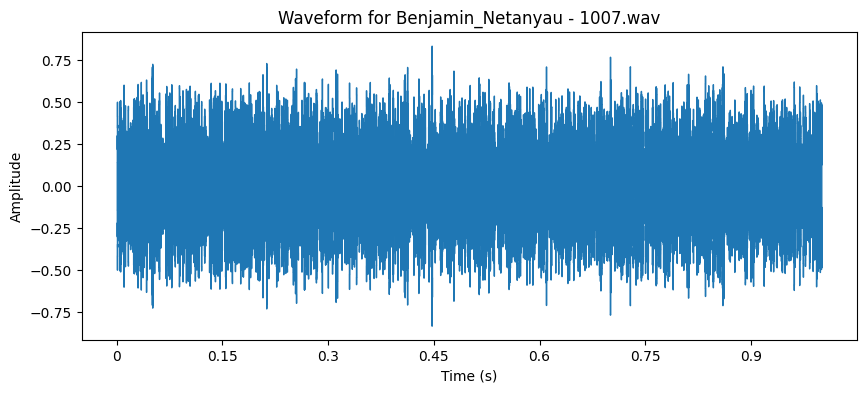

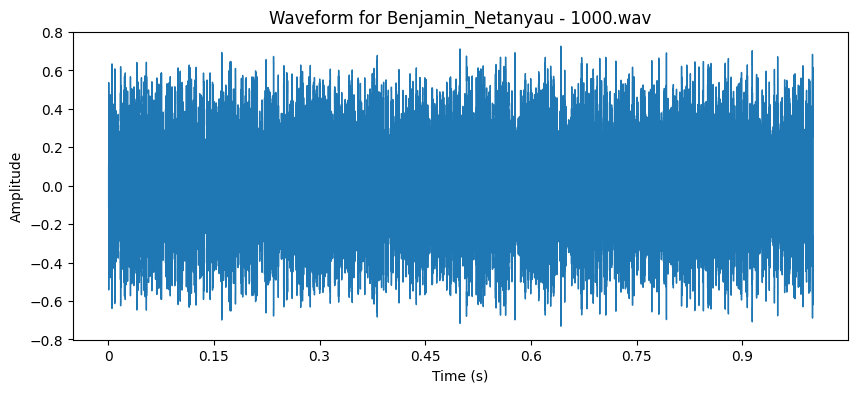

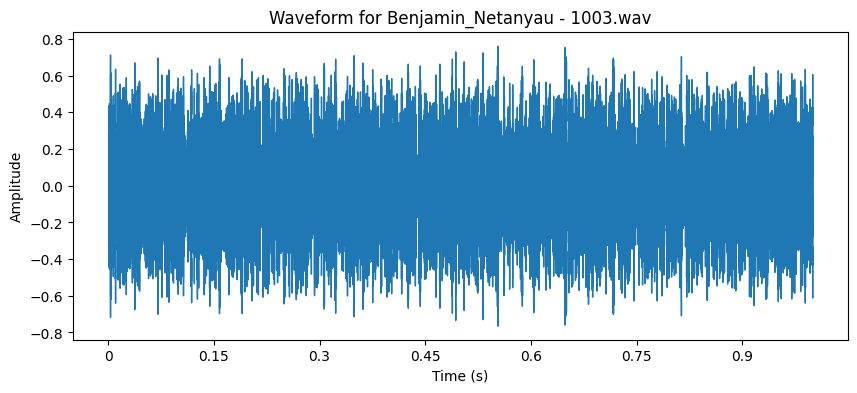

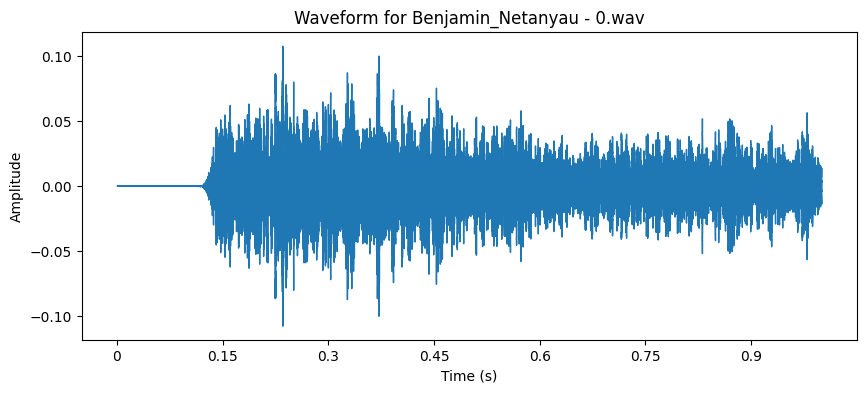

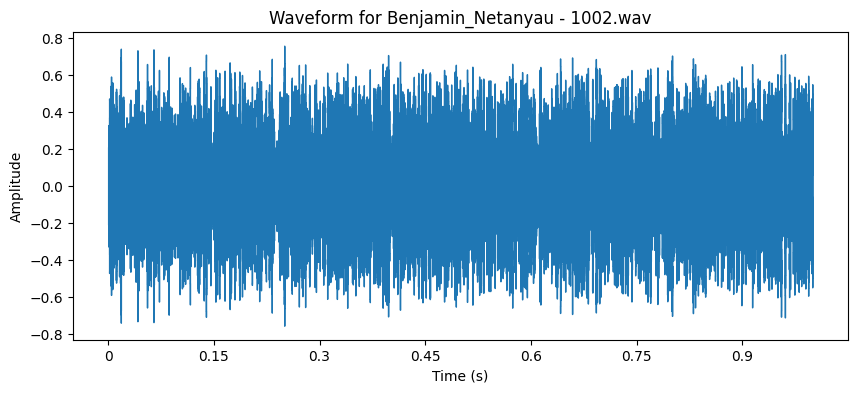

Clip: 1007.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1000.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1003.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 0.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1002.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz

Speaker: Jens_Stoltenberg, Number of Audio Clips: 1500


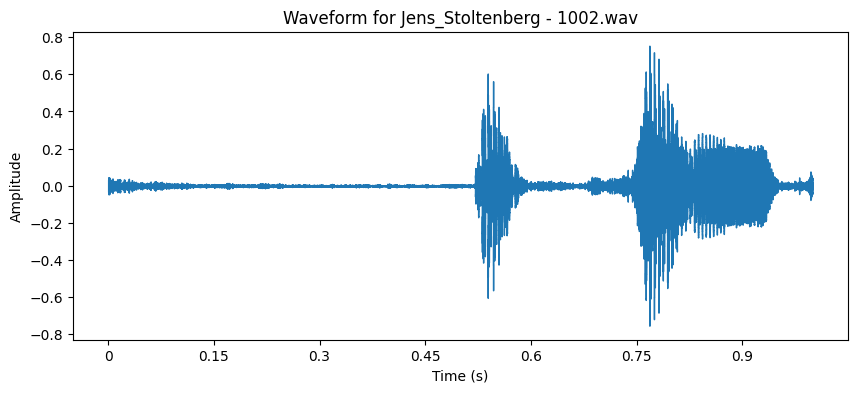

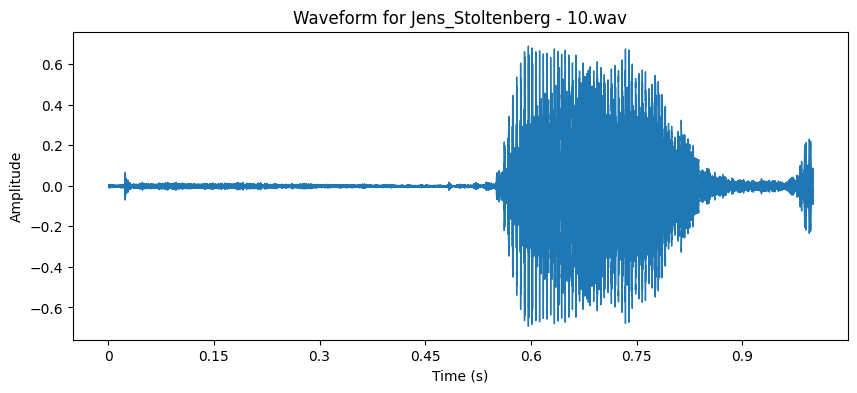

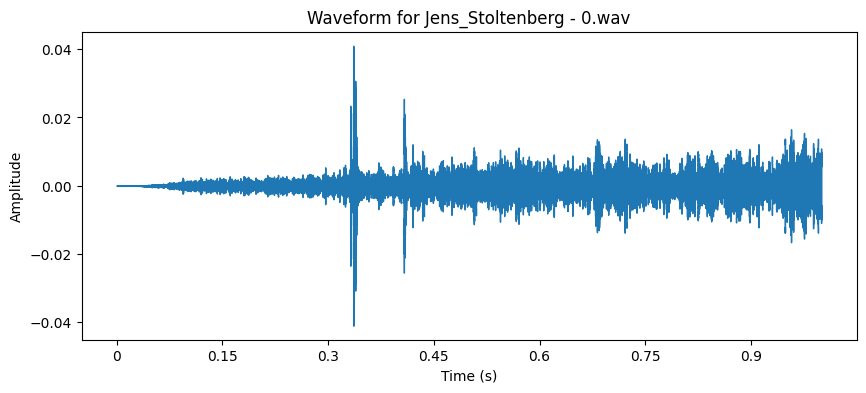

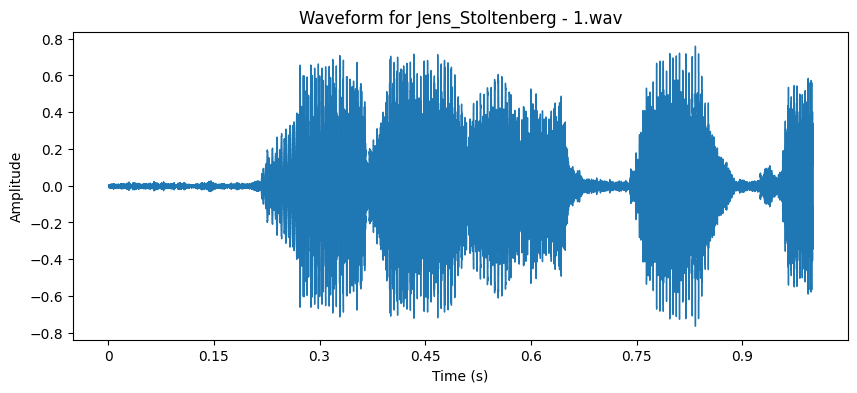

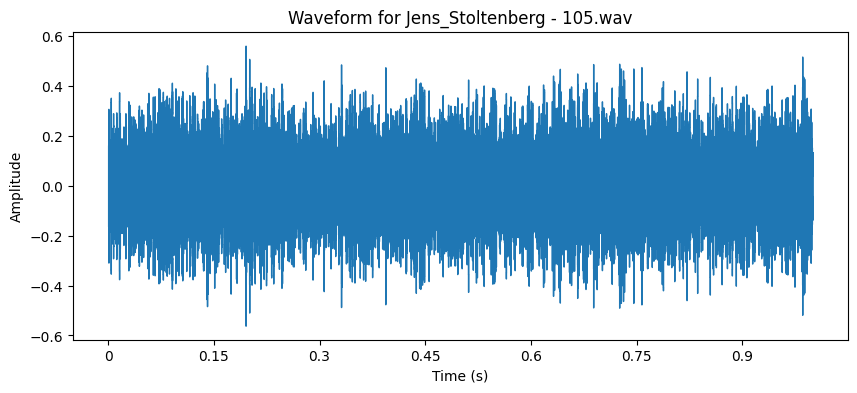

Clip: 1002.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 10.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 0.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 105.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz

Speaker: Julia_Gillard, Number of Audio Clips: 1501


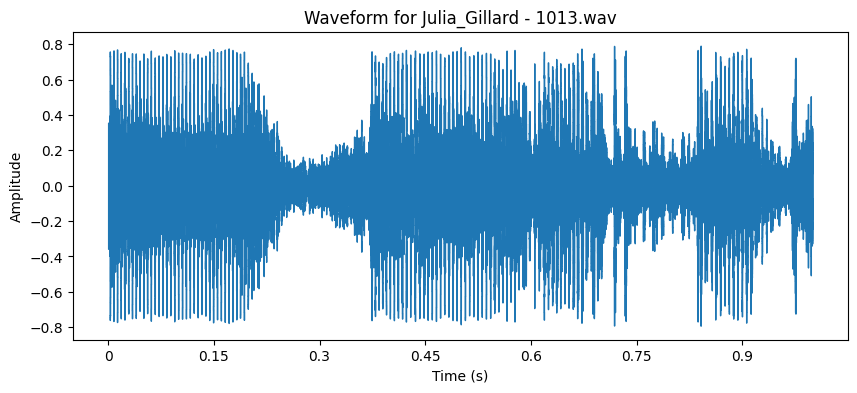

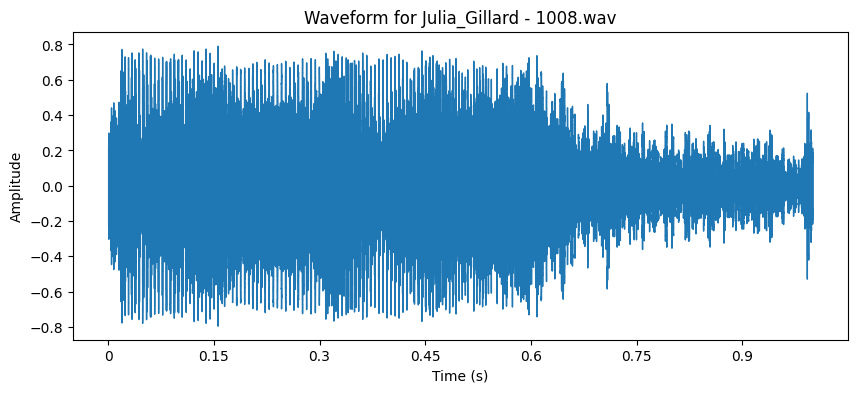

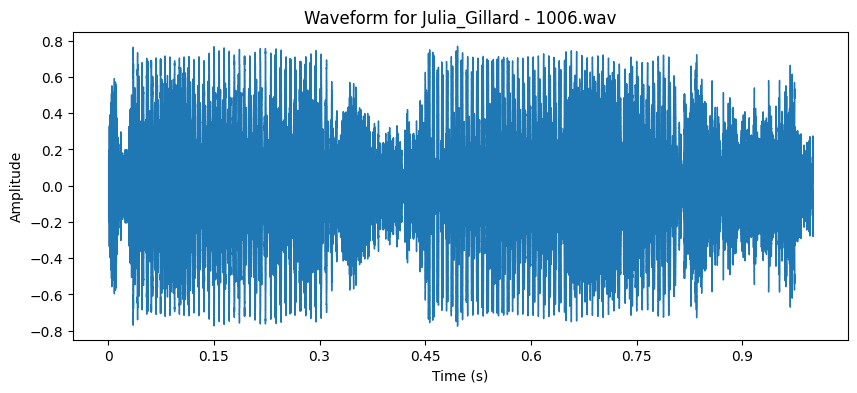

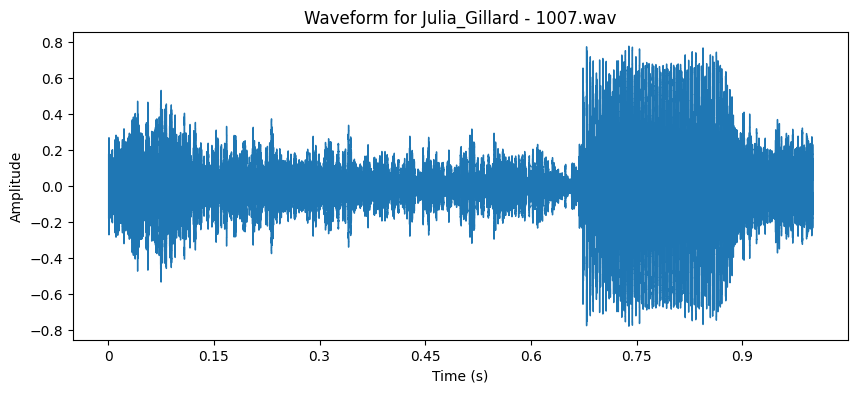

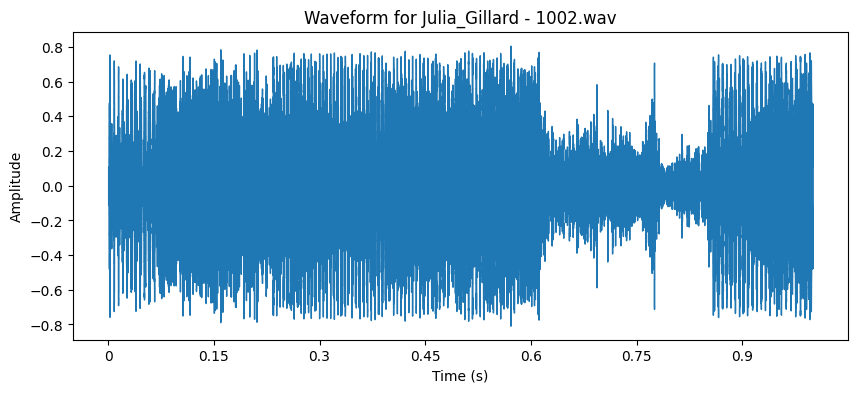

Clip: 1013.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1008.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1006.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1007.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1002.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz

Speaker: Magaret_Tarcher, Number of Audio Clips: 1500


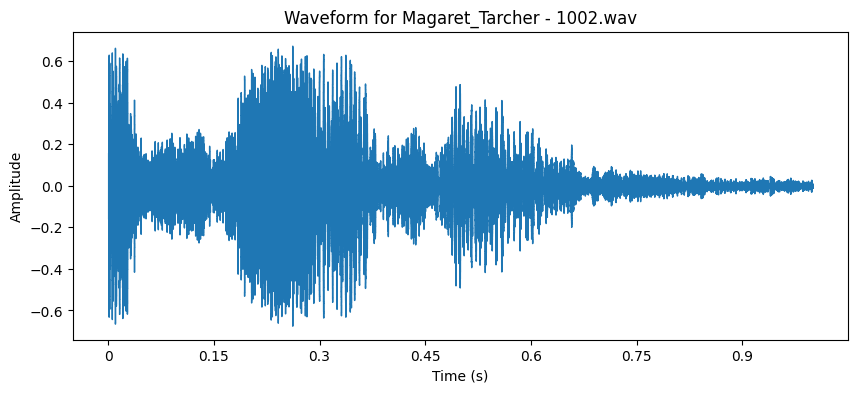

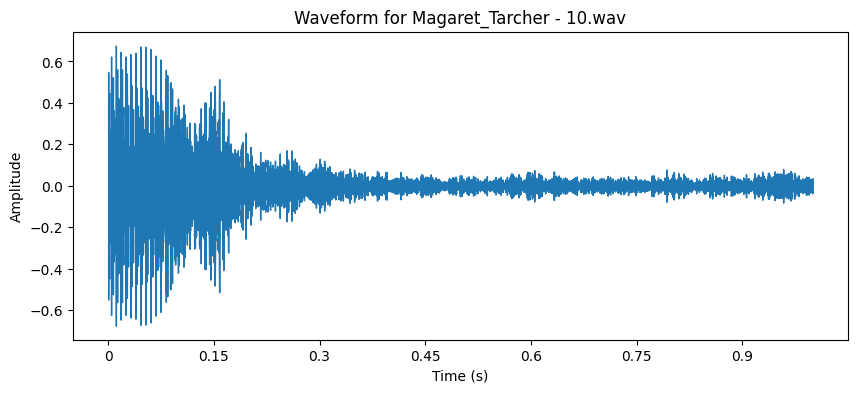

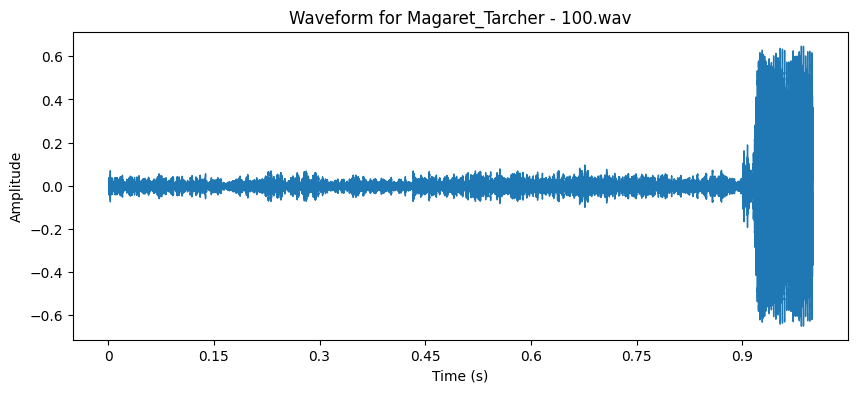

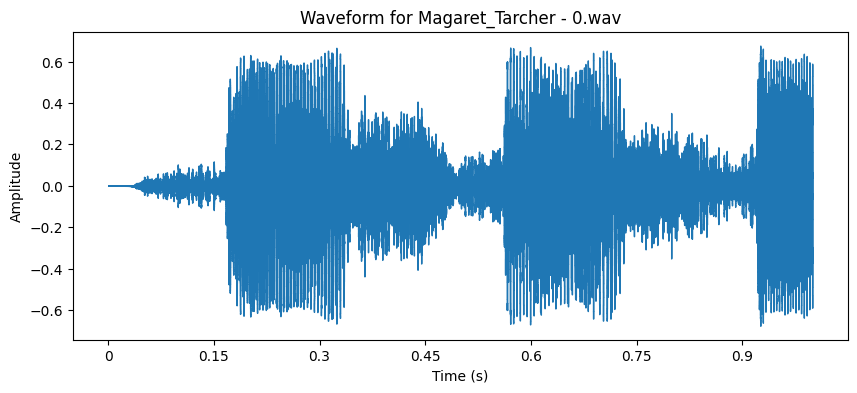

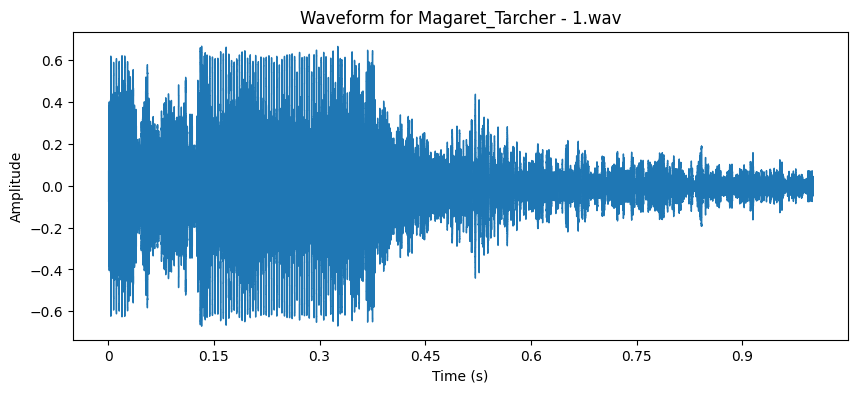

Clip: 1002.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 10.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 100.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 0.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz

Speaker: Nelson_Mandela, Number of Audio Clips: 1500


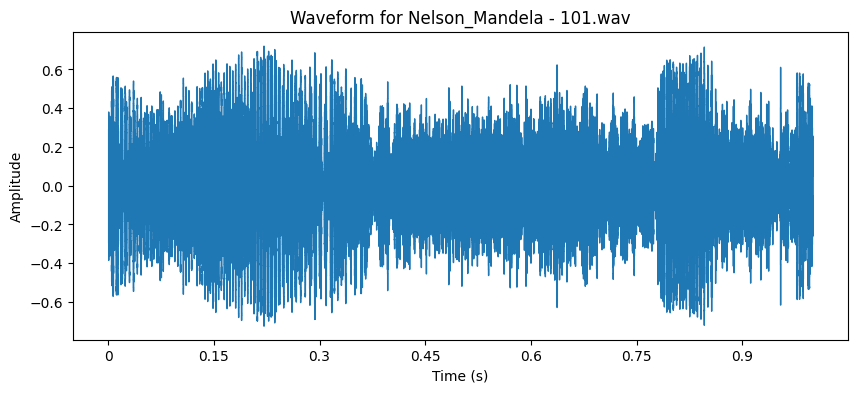

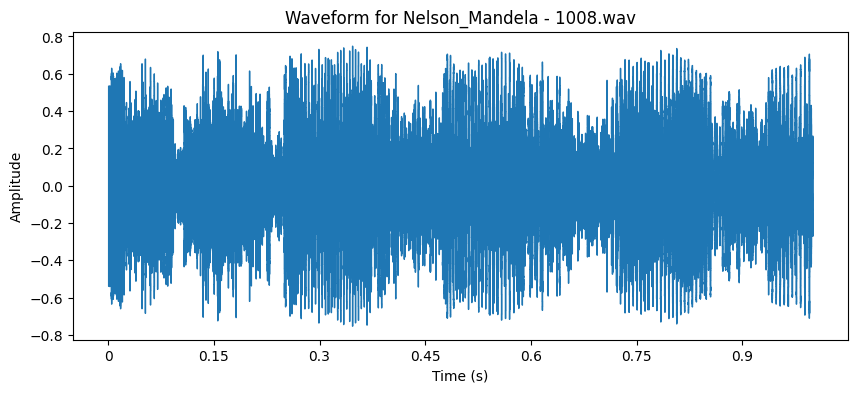

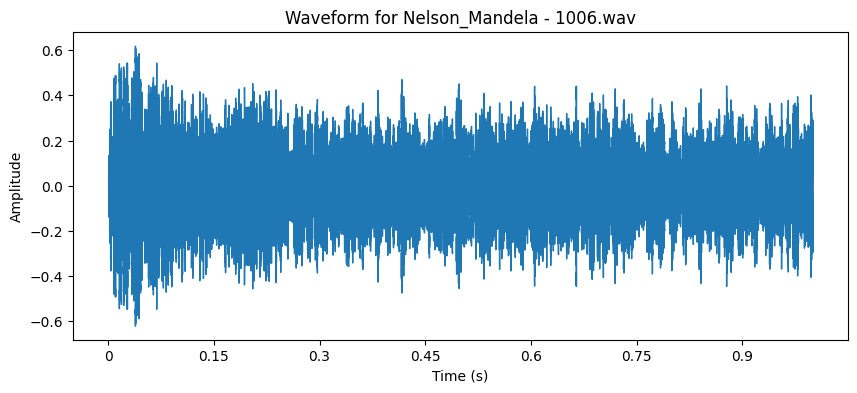

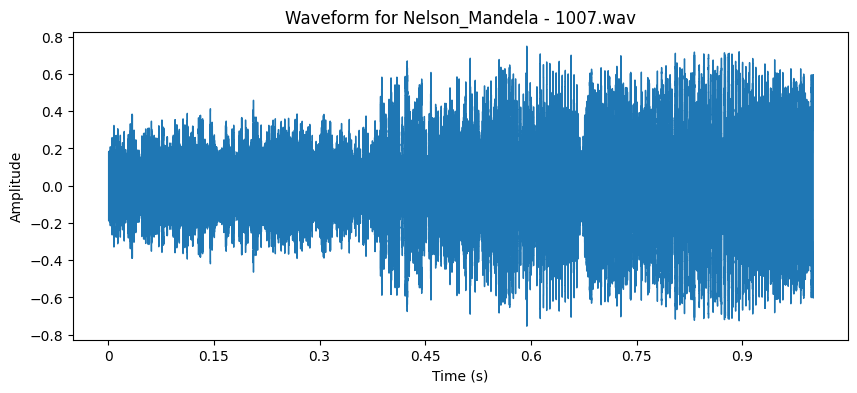

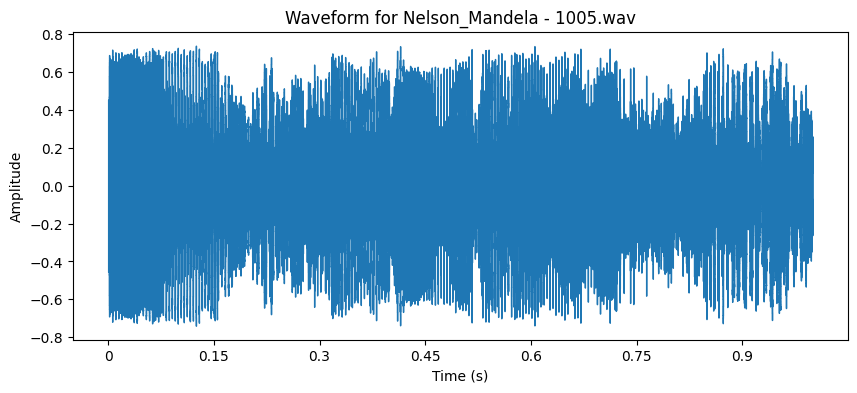

Clip: 101.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1008.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1006.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1007.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz
Clip: 1005.wav, Duration: 1.00 seconds, Sample Rate: 22050 Hz

Speaker: other, Number of Audio Clips: 2


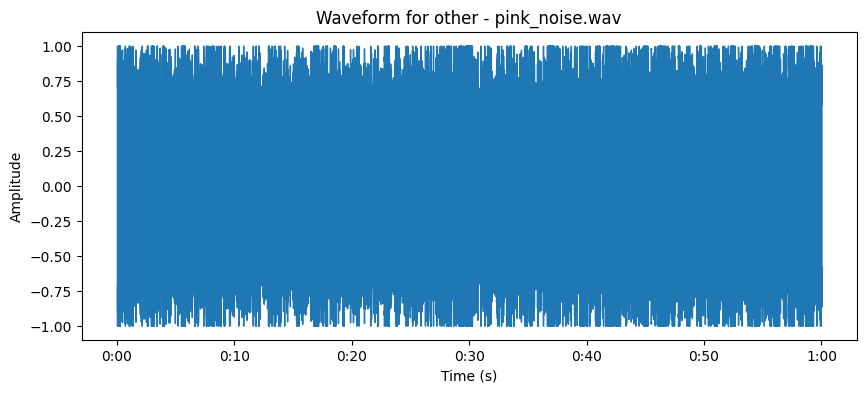

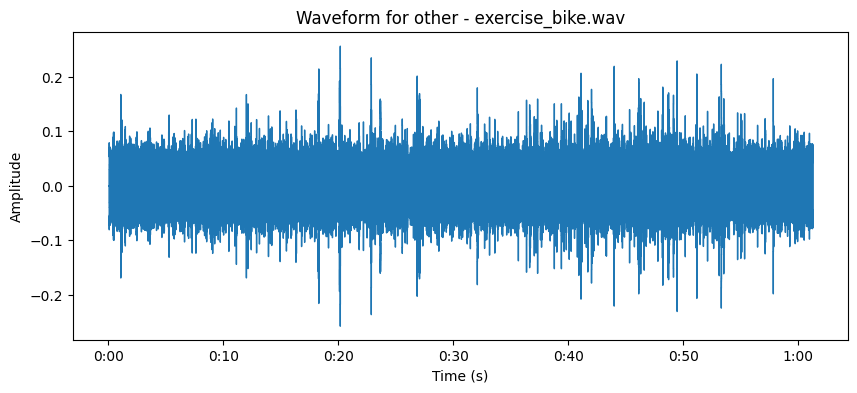

Clip: pink_noise.wav, Duration: 60.00 seconds, Sample Rate: 22050 Hz
Clip: exercise_bike.wav, Duration: 61.25 seconds, Sample Rate: 22050 Hz

Speaker: _background_noise_, Number of Audio Clips: 4


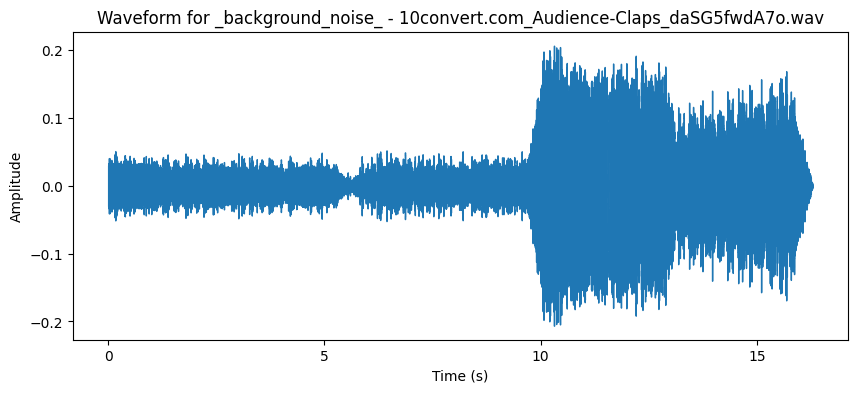

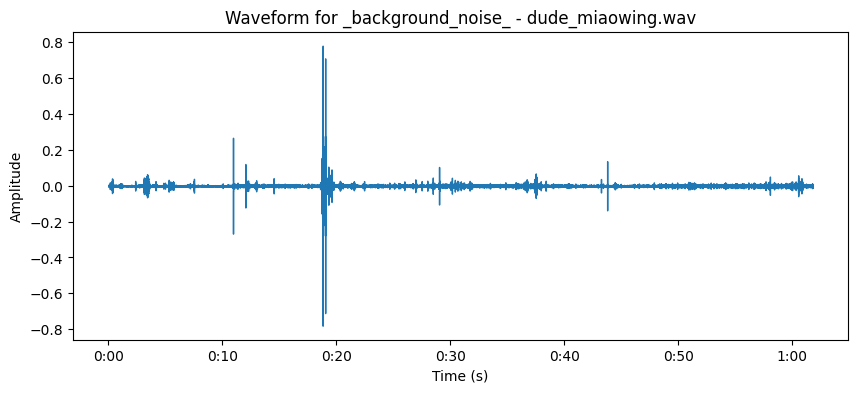

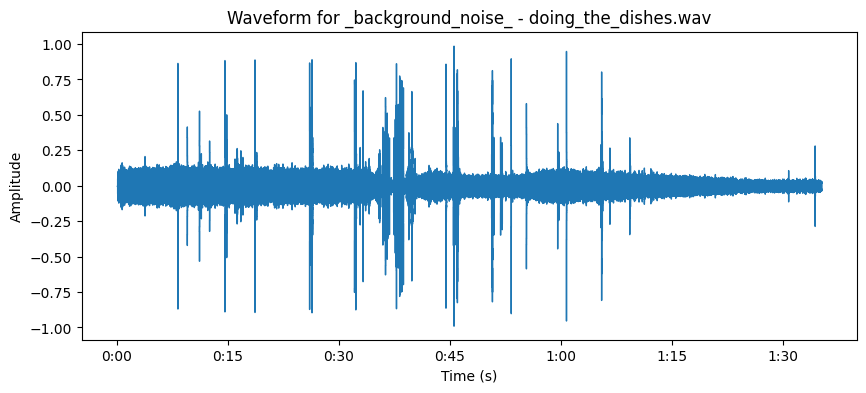

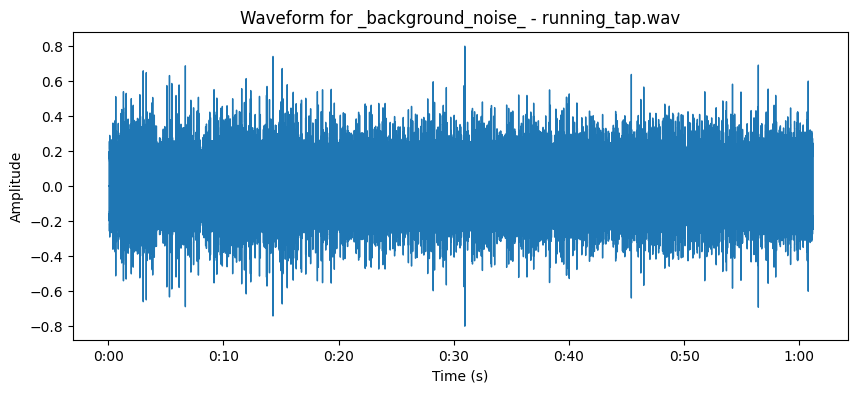

Clip: 10convert.com_Audience-Claps_daSG5fwdA7o.wav, Duration: 16.29 seconds, Sample Rate: 22050 Hz
Clip: dude_miaowing.wav, Duration: 61.81 seconds, Sample Rate: 22050 Hz
Clip: doing_the_dishes.wav, Duration: 95.18 seconds, Sample Rate: 22050 Hz
Clip: running_tap.wav, Duration: 61.16 seconds, Sample Rate: 22050 Hz



In [ ]:
#dataset_directory = '/content/drive/MyDrive/ML Pro'

file_to_ignore = 'tf_Wav_reader.py'

speakers = [dir for dir in os.listdir(dataset_directory) if dir != file_to_ignore]

num_clips_to_visualize = 5

for speaker in speakers:
    speaker_path = os.path.join(dataset_directory, speaker)
    audio_files = os.listdir(speaker_path)

    num_audio_clips = len(audio_files)

    # Print speaker and number of audio clips
    print(f"Speaker: {speaker}, Number of Audio Clips: {num_audio_clips}")

    # Visualize a few audio clips' waveforms
    for audio_clip_file in audio_files[:num_clips_to_visualize]:
        audio_clip_path = os.path.join(speaker_path, audio_clip_file)
        audio, sample_rate = librosa.load(audio_clip_path)

        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio, sr=sample_rate)
        plt.title(f"Waveform for {speaker} - {audio_clip_file}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

    # Analyze clip duration and sample rate for a few clips
    for audio_clip_file in audio_files[:num_clips_to_visualize]:
        audio_clip_path = os.path.join(speaker_path, audio_clip_file)
        audio, sample_rate = librosa.load(audio_clip_path)
        clip_duration = len(audio) / sample_rate
        print(f"Clip: {audio_clip_file}, Duration: {clip_duration:.2f} seconds, Sample Rate: {sample_rate} Hz")
    print()

(3)

In [ ]:
import os
import librosa
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

#data_dir = '/content/drive/MyDrive/ML Pro/'
data_dir = dataset_directory

# Define a list of speaker categories
categories = ["Nelson_Mandela", "Magaret_Tarcher", "Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard"]

paths_dict = {}

def get_wav_paths(speaker):
    speaker_path = os.path.join(data_dir, speaker)

    if not os.path.exists(speaker_path):
        return []

    wav_paths = [os.path.join(speaker_path, filename) for filename in os.listdir(speaker_path) if filename.lower().endswith('.wav')]

    return wav_paths

for category in categories:
    paths_dict[category] = get_wav_paths(category)

def load_wav(wav_path, sample_rate=16000):
    try:
        wav_data, _ = librosa.load(wav_path, sr=sample_rate, mono=True)
        return wav_data
    except Exception as e:
        print(f"Error loading WAV file: {e}")
        return None

def generate_training_data(speaker_paths, label):
    wavs, labels = [], []

    for speaker_path in tqdm(speaker_paths):
        wav = load_wav(speaker_path)
        if wav is not None:
            wavs.append(wav)
            labels.append(label)

    df = pd.DataFrame({'Audio': wavs, 'Label': labels})

    return df

nelson_mandela_paths = get_wav_paths("Nelson_Mandela")
margaret_thatcher_paths = get_wav_paths("Magaret_Tarcher")
benjamin_netanyau_paths = get_wav_paths("Benjamin_Netanyau")
jens_stoltenberg_paths = get_wav_paths("Jens_Stoltenberg")
julia_gillard_paths = get_wav_paths("Julia_Gillard")

# Define a list of speaker names and their corresponding labels
speakers_data = {
    "Nelson_Mandela": 0,
    "Magaret_Tarcher": 1,
    "Benjamin_Netanyau": 2,
    "Jens_Stoltenberg": 3,
    "Julia_Gillard": 4
}

all_data_frames = []

for speaker, label in speakers_data.items():
    if speaker in paths_dict:
        df = generate_training_data(paths_dict[speaker], label)
        all_data_frames.append(df)

# Concatenate all data frames
training_data = pd.concat(all_data_frames, ignore_index=True)

100%|██████████| 1501/1501 [00:02<00:00, 545.34it/s]


((4) Amplitude

In [ ]:
import random

num_samples_to_plot = 5

# Plot a random subset of audio samples for each speaker, including the file name
for speaker_name, label in speakers_data.items():
    speaker_data = training_data[training_data['Label'] == label]

    random_samples = random.sample(list(speaker_data['Audio']), num_samples_to_plot)
    sample_names = random.sample(list(speaker_data.index), num_samples_to_plot)

    for i, (audio_sample, sample_name) in enumerate(zip(random_samples, sample_names)):
        plt.figure(figsize=(10, 3))
        plt.title(f"Amplitude vs. Time - Speaker: {speaker_name}, File: {sample_name} (Sample {i+1}/{num_samples_to_plot})")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.plot(audio_sample)
        plt.show()

(5)Noise

In [ ]:
!pip install pydub

In [ ]:
!pip install AudioSegment

In [ ]:
from pydub import AudioSegment
import numpy as np

def calculate_snr(wav_path):
    audio = AudioSegment.from_wav(wav_path)
    samples = np.array(audio.get_array_of_samples())

    rms = np.sqrt(np.mean(np.square(samples)))
    threshold = 0.01

    snr_db = 20 * np.log10(rms)

    if snr_db > threshold:
        return "Not Noisy"
    else:
        return "Noisy"

categories = ["Nelson_Mandela", "Magaret_Tarcher", "Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard"]

paths_dict = {}

def get_wav_paths(speaker):
    speaker_path = os.path.join(data_dir, speaker)

    if not os.path.exists(speaker_path):
        return []

    wav_paths = [os.path.join(speaker_path, filename) for filename in os.listdir(speaker_path) if filename.lower().endswith('.wav')]

    return wav_paths

for category in categories:
    paths_dict[category] = get_wav_paths(category)

for category in categories:
    speaker_paths = paths_dict[category]
    for wav_path in speaker_paths:
        result = calculate_snr(wav_path)
        print(f"Speaker: {category}, WAV file: {wav_path}, SNR: {result}")

(6)Power

In [ ]:
import os
import librosa
import numpy as np

#data_dir = '/content/drive/MyDrive/ML Pro'

categories = ["Nelson_Mandela", "Magaret_Tarcher", "Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard"]

paths_dict = {}

def get_wav_paths(speaker):
    speaker_path = os.path.join(data_dir, speaker)

    if not os.path.exists(speaker_path):
        return []

    wav_paths = [os.path.join(speaker_path, filename) for filename in os.listdir(speaker_path) if filename.lower().endswith('.wav')]

    return wav_paths

for category in categories:
    paths_dict[category] = get_wav_paths(category)

# Function to calculate the power of an audio signal
def calculate_power(audio_signal):

    power = np.mean(audio_signal ** 2)
    return power

for category in categories:
    speaker_paths = paths_dict[category]
    speaker_power = []

    for wav_path in speaker_paths:
        audio, _ = librosa.load(wav_path, sr=None)
        power = calculate_power(audio)
        speaker_power.append(power)

    average_power = np.mean(speaker_power)
    print(f"{category} - Average Power: {average_power:.2f}")

(7)Energy

In [ ]:
import os
import librosa
import numpy as np

# Define the data directory
#data_dir = '/content/drive/MyDrive/ML Pro'

categories = ["Nelson_Mandela", "Magaret_Tarcher", "Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard"]

paths_dict = {}

def get_wav_paths(speaker):
    speaker_path = os.path.join(data_dir, speaker)

    if not os.path.exists(speaker_path):
        return []

    wav_paths = [os.path.join(speaker_path, filename) for filename in os.listdir(speaker_path) if filename.lower().endswith('.wav')]

    return wav_paths

for category in categories:
    paths_dict[category] = get_wav_paths(category)

# Function to calculate the energy of an audio signal
def calculate_energy(audio_signal):

    energy = np.sum(audio_signal ** 2)
    return energy

for category in categories:
    speaker_paths = paths_dict[category]
    speaker_energy = []

    for wav_path in speaker_paths:

        audio, _ = librosa.load(wav_path, sr=None)
        energy = calculate_energy(audio)
        speaker_energy.append(energy)

    total_energy = np.sum(speaker_energy)
    print(f"{category} - Total Energy: {total_energy:.2f}")

(8) Energy per window

In [ ]:
import os
import librosa
import numpy as np

#data_dir = '/content/drive/MyDrive/ML Pro'

categories = ["Nelson_Mandela", "Magaret_Tarcher", "Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard"]

paths_dict = {}

def get_wav_paths(speaker):
    speaker_path = os.path.join(data_dir, speaker)

    if not os.path.exists(speaker_path):
        return []

    wav_paths = [os.path.join(speaker_path, filename) for filename in os.listdir(speaker_path) if filename.lower().endswith('.wav')]

    return wav_paths

for category in categories:
    paths_dict[category] = get_wav_paths(category)

def calculate_energy_per_window(audio_signal, window_size, hop_size):

    energy_per_window = []

    num_windows = (len(audio_signal) - window_size) // hop_size + 1

    for i in range(num_windows):
        start = i * hop_size
        end = start + window_size
        window = audio_signal[start:end]
        energy = np.sum(window ** 2)
        energy_per_window.append(energy)

    return energy_per_window

window_size = 1024
hop_size = 512

for category in categories:
    speaker_paths = paths_dict[category]
    speaker_energy_per_window = []

    for wav_path in speaker_paths:
        # Load the audio
        audio, _ = librosa.load(wav_path, sr=None)  # sr=None to keep original sample rate
        energy_per_window = calculate_energy_per_window(audio, window_size, hop_size)
        speaker_energy_per_window.extend(energy_per_window)

    print(f"{category} - Energy per Window: {speaker_energy_per_window}")

Spectogram

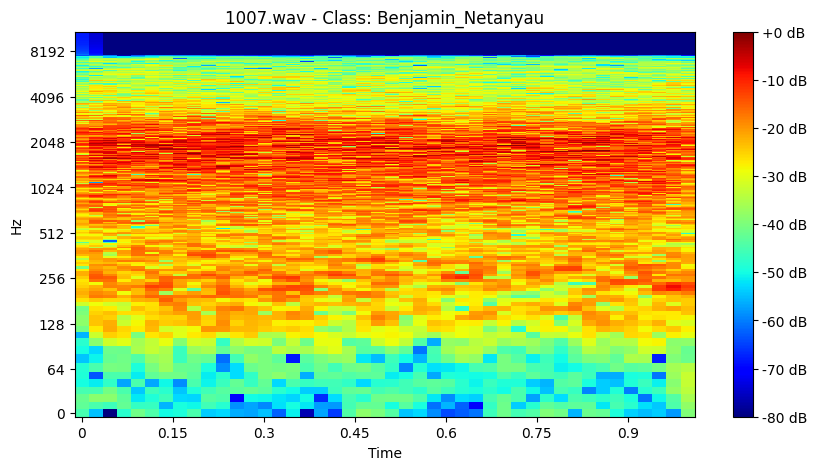

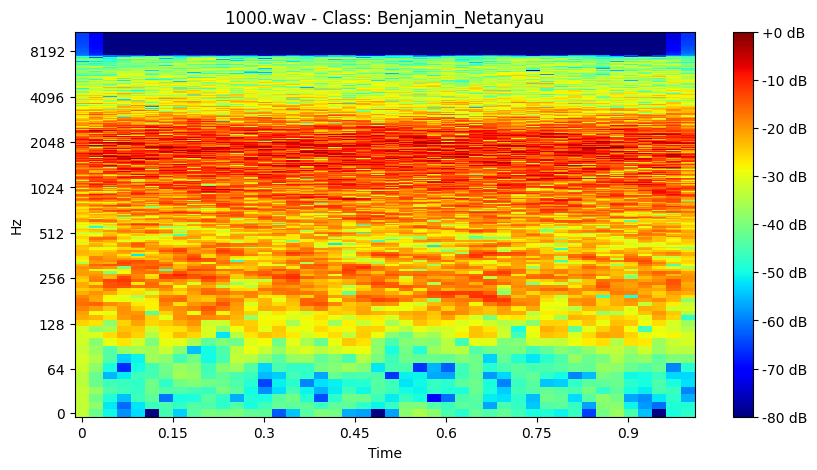

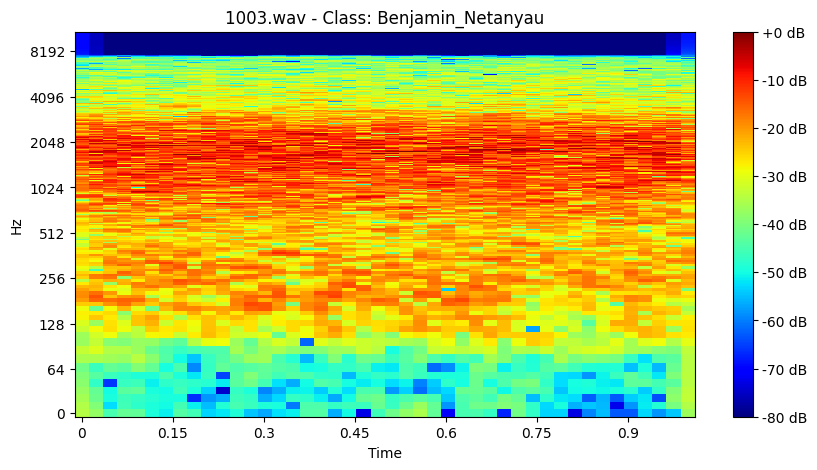

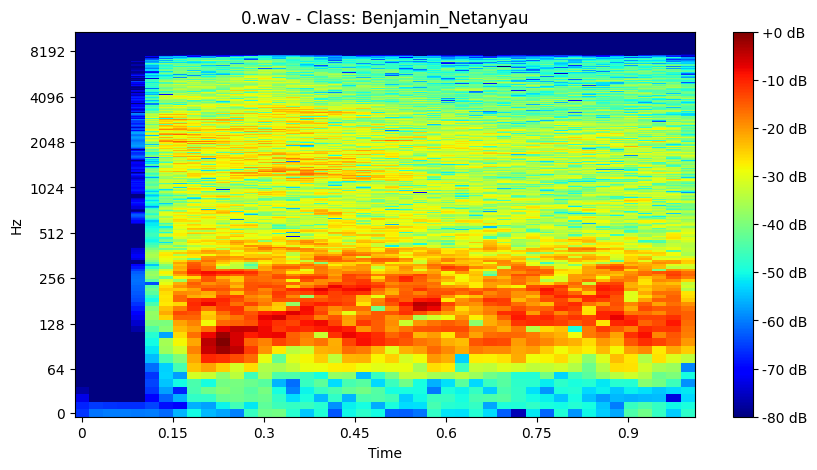

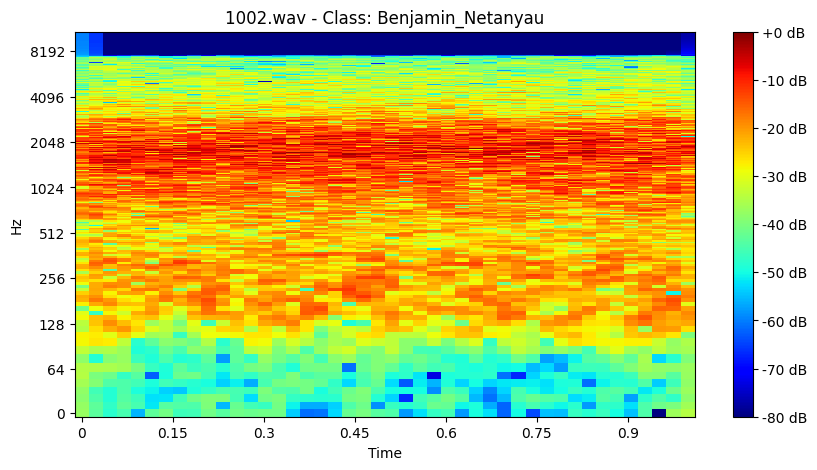

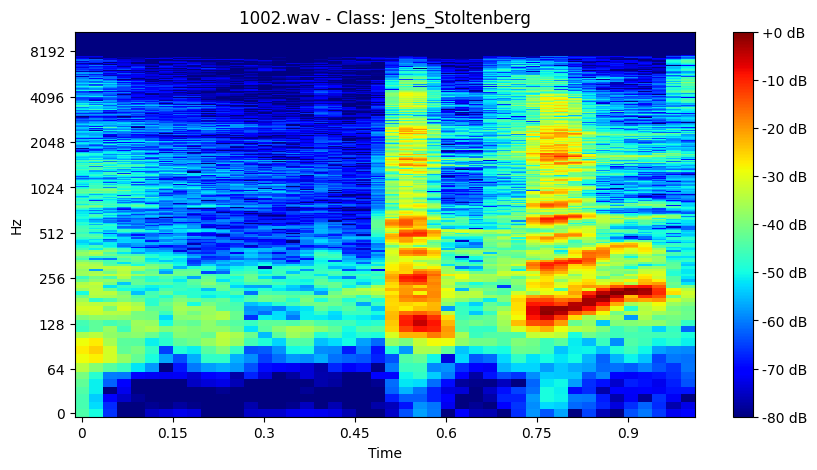

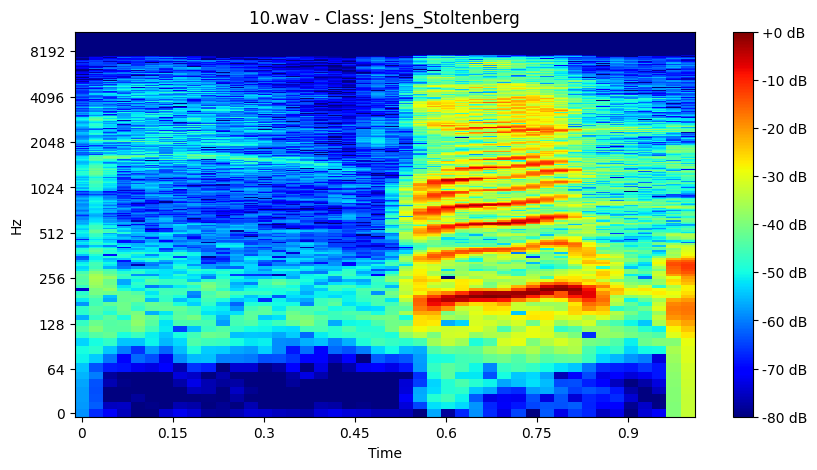

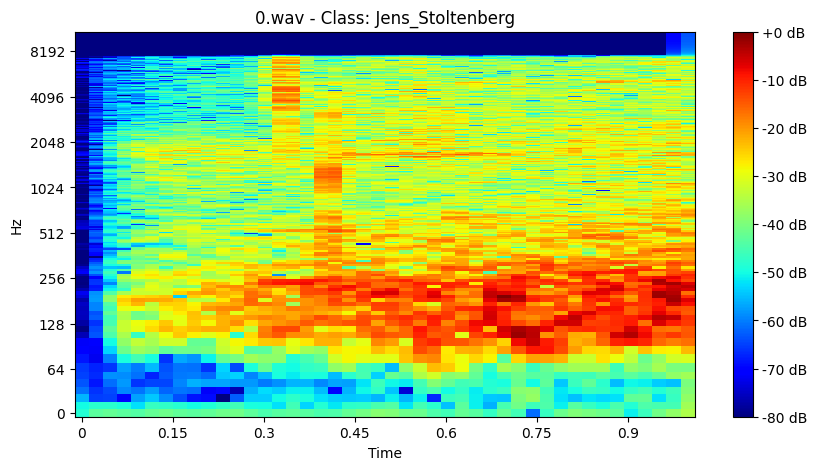

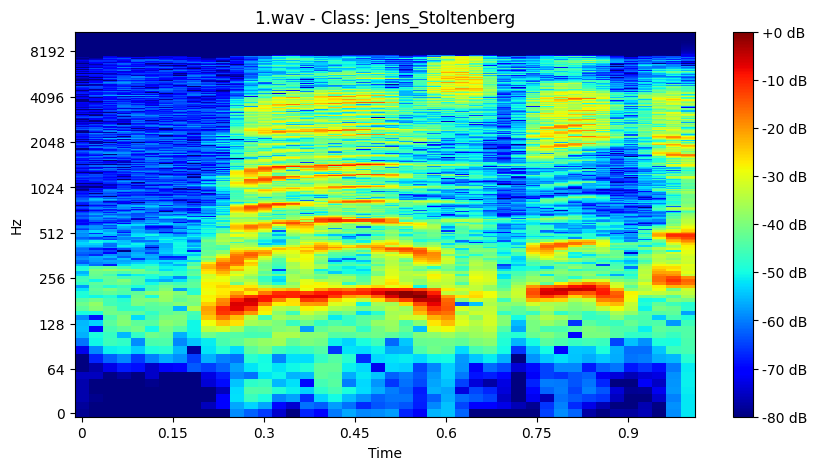

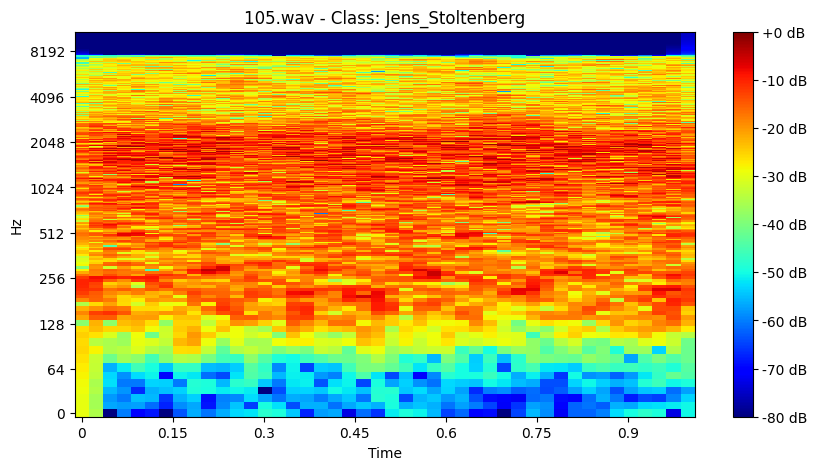

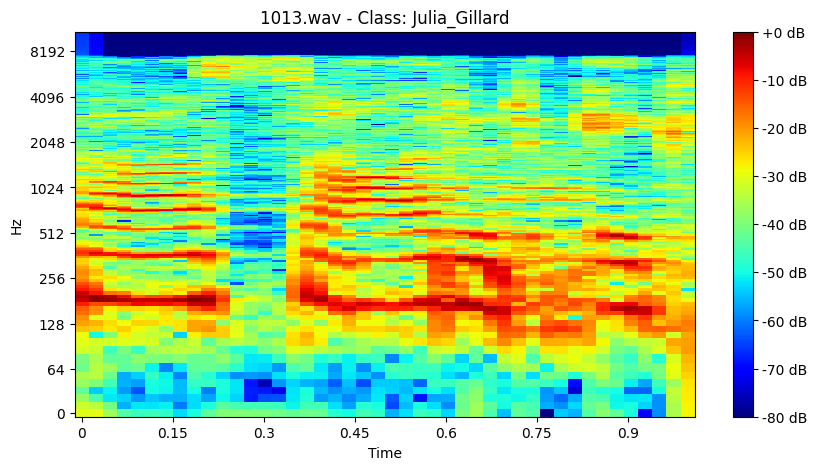

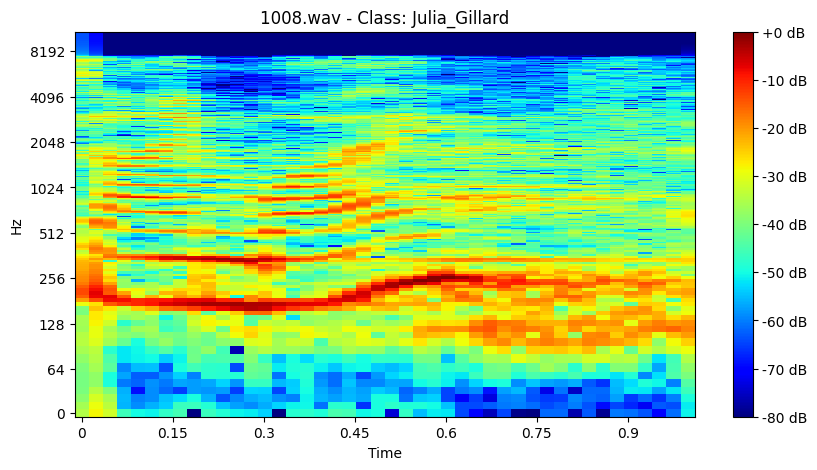

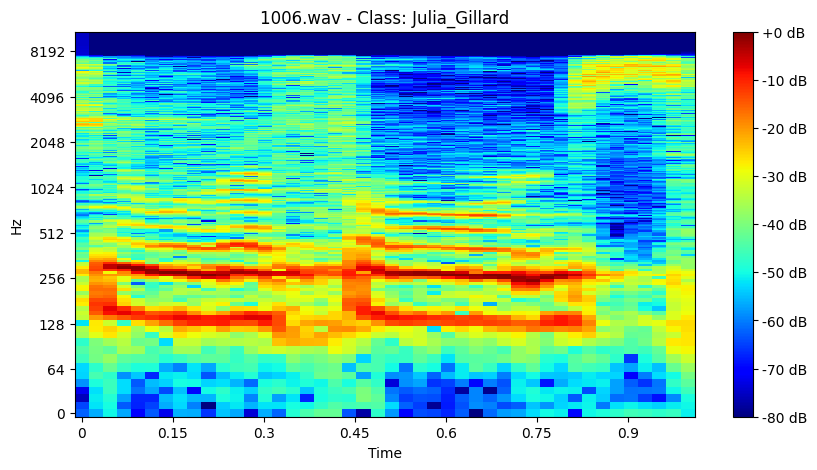

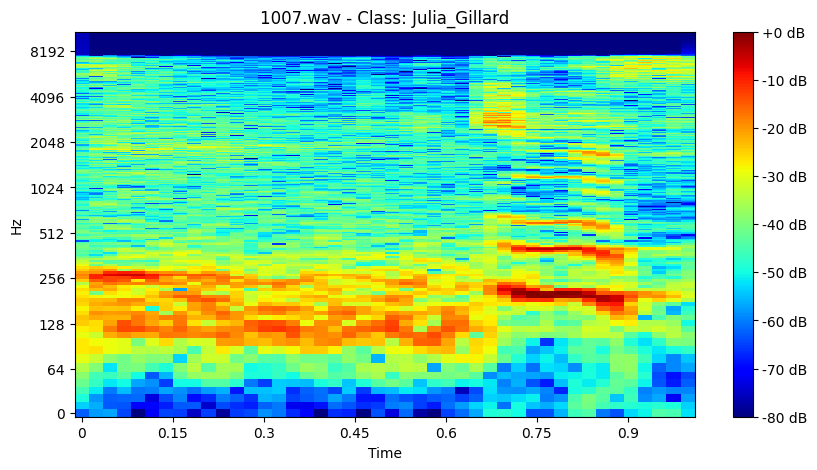

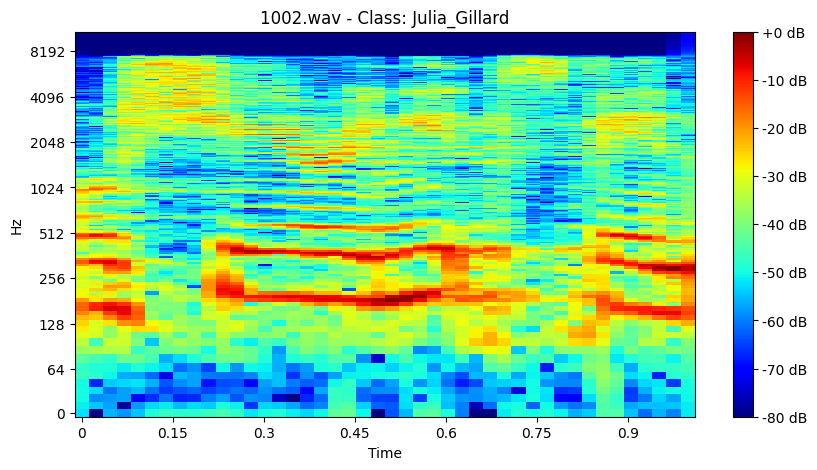

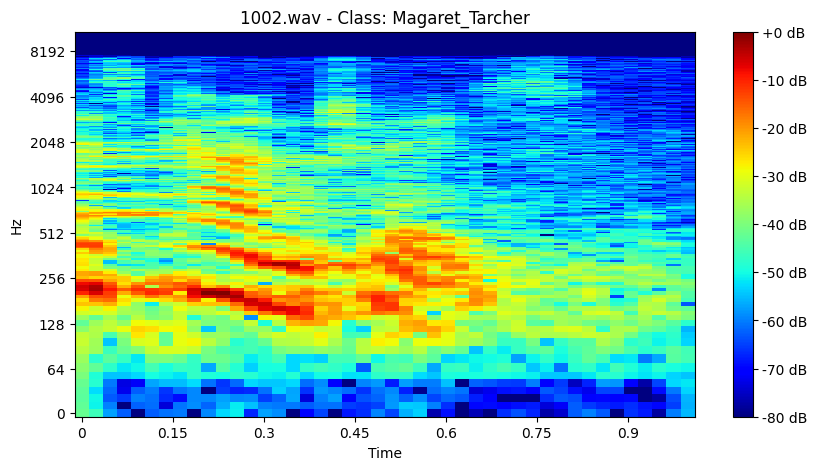

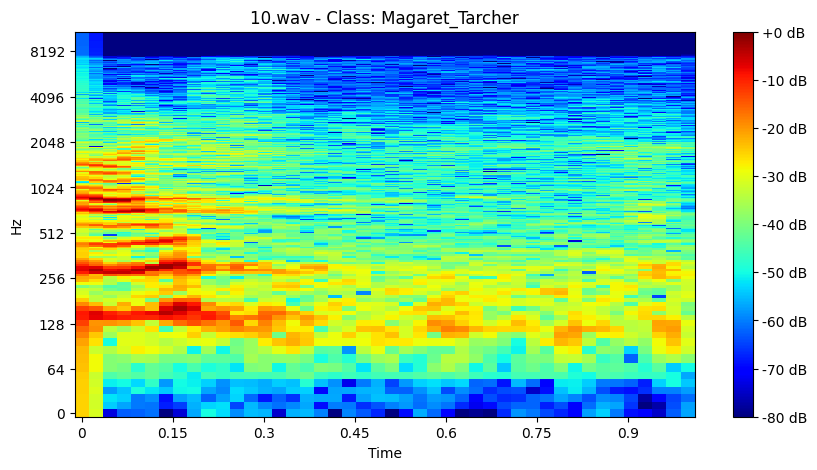

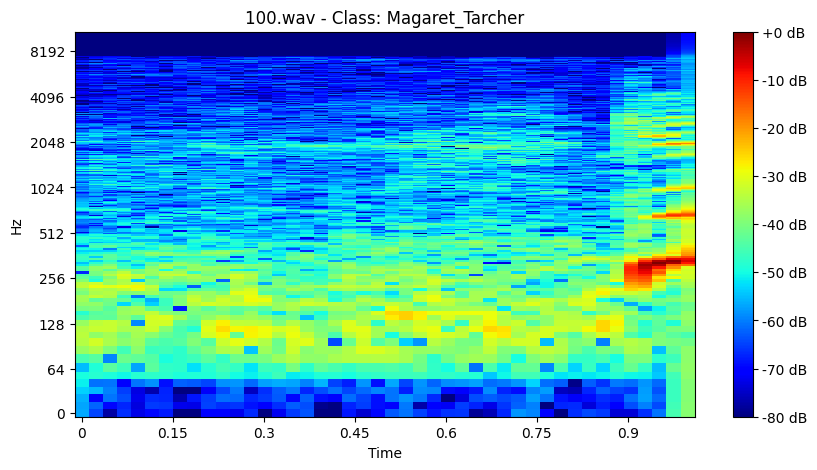

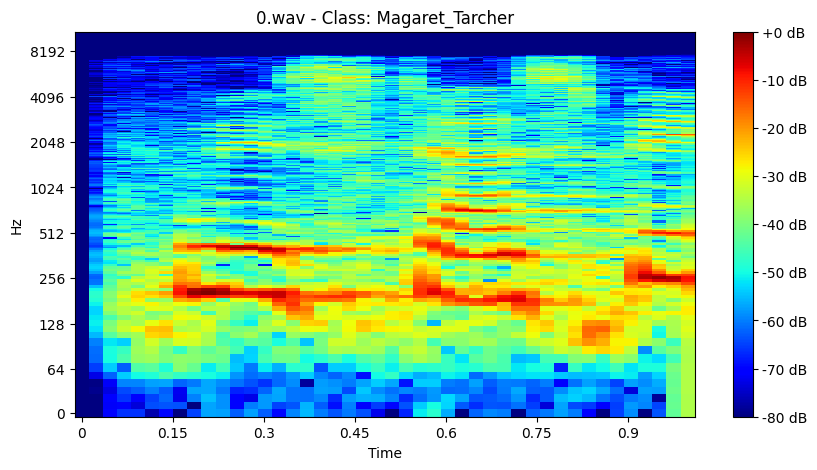

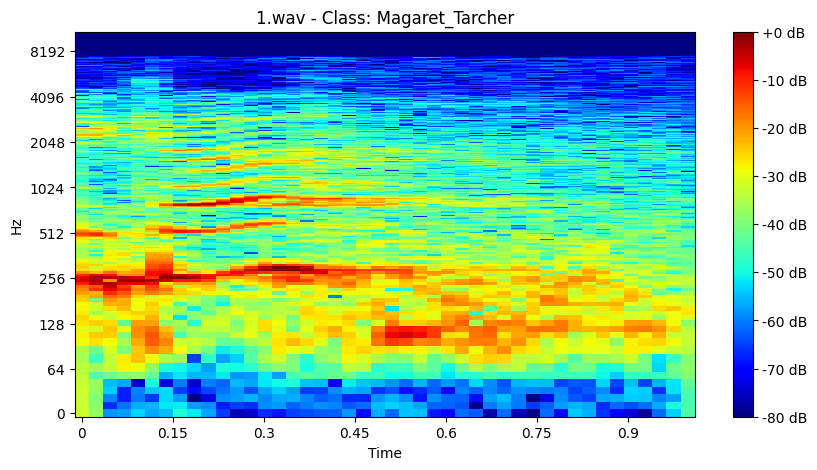

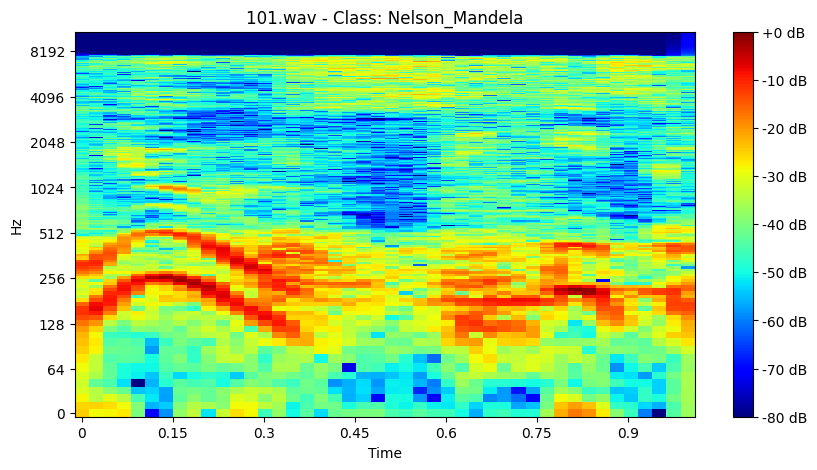

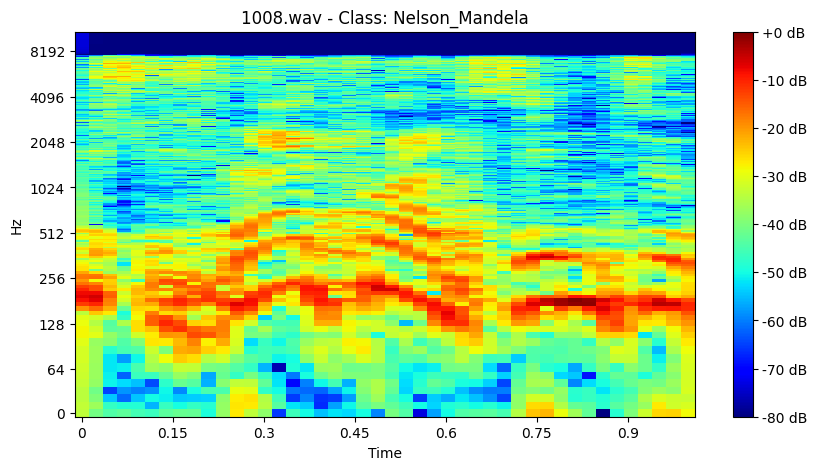

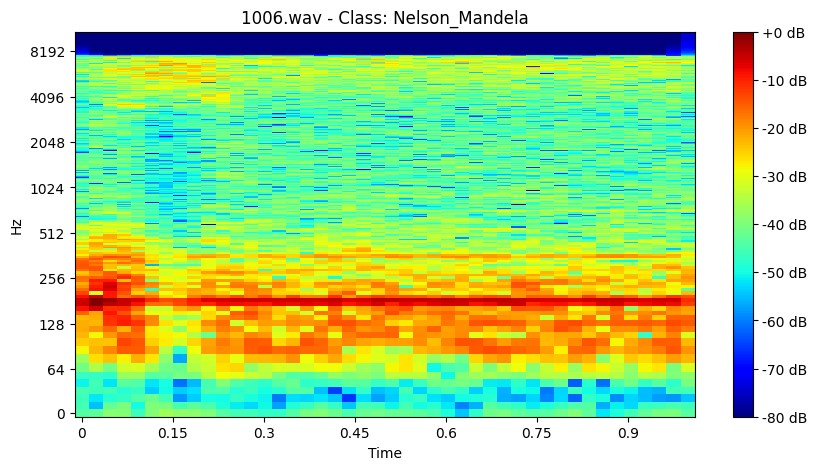

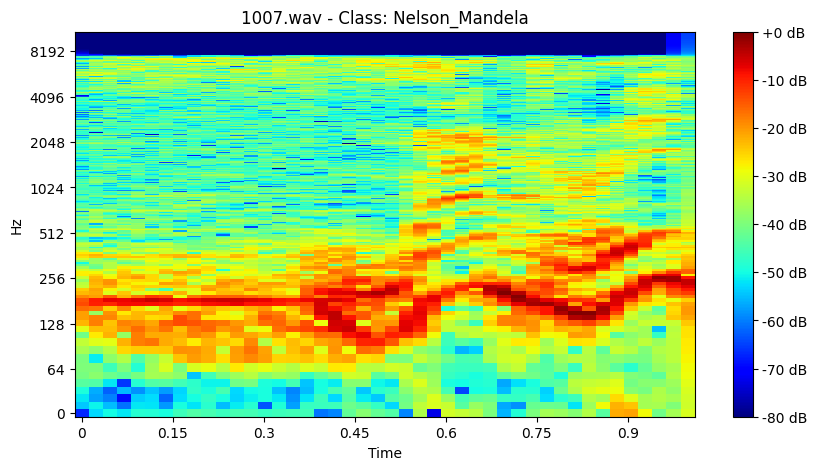

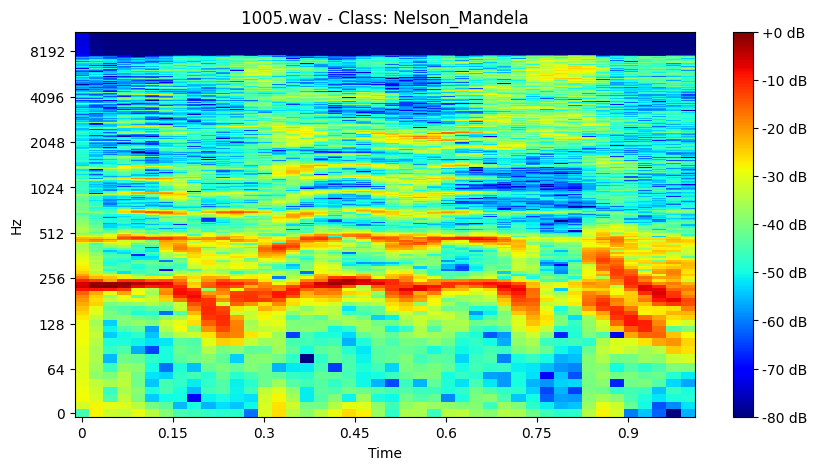

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


#base_dir = "/content/drive/MyDrive/16000_pcm_speeches"
base_dir = dataset_directory

classes = os.listdir(base_dir)

num_audio_per_class = 5

# Create a Jet colormap
cmap = plt.get_cmap('jet')

for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)

    if not os.path.isdir(class_dir):
        continue

    audio_files = [f for f in os.listdir(class_dir) if f.endswith('.wav')]

    if len(audio_files) < num_audio_per_class:
        continue
    selected_audio_files = audio_files[:num_audio_per_class]

    for audio_file in selected_audio_files:
        audio_path = os.path.join(class_dir, audio_file)
        y, sr = librosa.load(audio_path)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

        plt.figure(figsize=(10, 5))
        librosa.display.specshow(D, cmap=cmap, sr=sr, x_axis='time', y_axis='log')
        plt.title(f"{audio_file} - Class: {class_name}")
        plt.colorbar(format='%+2.0f dB')
        plt.show()


MFCC

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
#base_dir = "/content/drive/MyDrive/16000_pcm_speeches"

classes = os.listdir(base_dir)

num_audio_per_class = 5

for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)

    if not os.path.isdir(class_dir):
        continue

    audio_files = [f for f in os.listdir(class_dir) if f.endswith('.wav')]
    if len(audio_files) < num_audio_per_class:
        continue

    selected_audio_files = audio_files[:num_audio_per_class]

    for audio_file in selected_audio_files:
        audio_path = os.path.join(class_dir, audio_file)
        y, sr = librosa.load(audio_path)

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        plt.figure(figsize=(10, 5))
        librosa.display.specshow(mfccs, x_axis='time')

        plt.title(f"{audio_file} - Class: {class_name}")
        plt.colorbar(format='%+2.0f dB')
        plt.show()


feature extraction and bar plot


In [ ]:
from glob import glob
#directories of normal audios

# norm_data_dir = ‘./audio-processing-files/normals/’
# norm_audio_files = glob(norm_data_dir + ‘*.mp3’)

In [ ]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]

fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr):
    feat_vect_i = [ np.mean(funct(y=y,sr=sr)) for funct in fn_list_i]
    feat_vect_ii = [ np.mean(funct(y=y)) for funct in fn_list_ii]
    feature_vector = feat_vect_i + feat_vect_ii
    return feature_vector

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
        return norm_arr

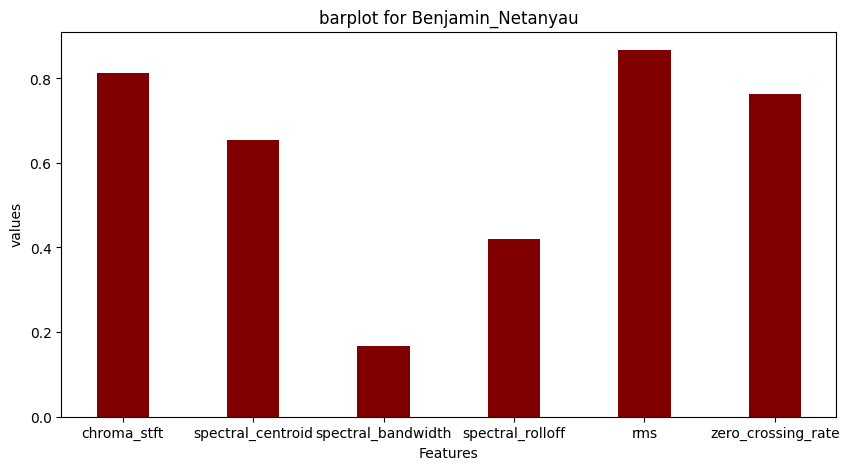

[0.8129413843311741, 0.6551874277132959, 0.16729817828196666, 0.4211343005663745, 0.8671545925689135, 0.7634297520661156]


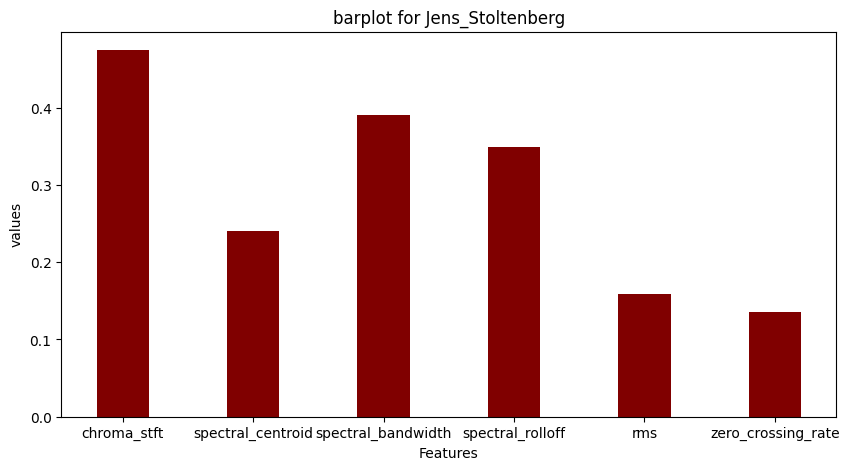

[0.4745284917528981, 0.24078119934872055, 0.39012265670845486, 0.3485336682868221, 0.15907133160458575, 0.1349605419372861]


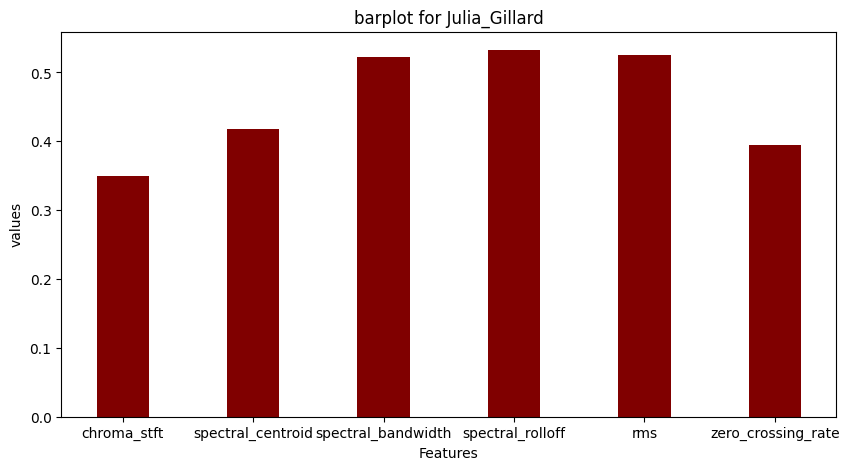

[0.3496842973057162, 0.4177168378473797, 0.5229318362631497, 0.5325472265672002, 0.5251398996625636, 0.39377986857825564]


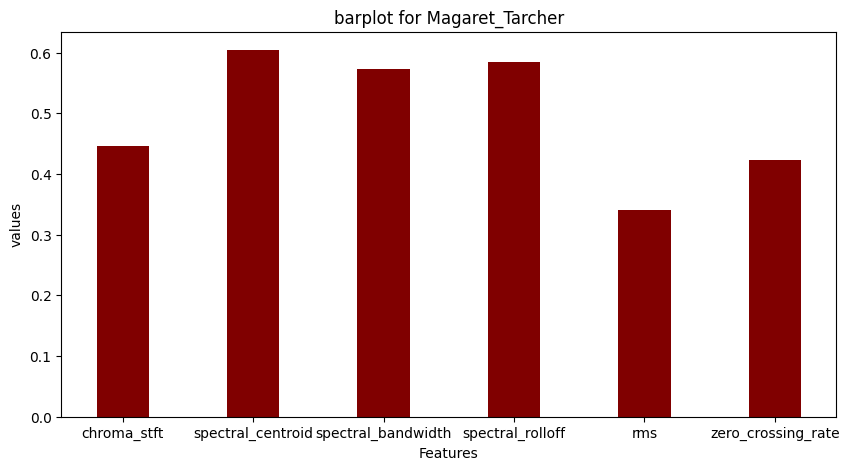

[0.4459422111375728, 0.6043613156775418, 0.57254196479795, 0.5836805771503204, 0.33987268413198174, 0.42209552294606967]


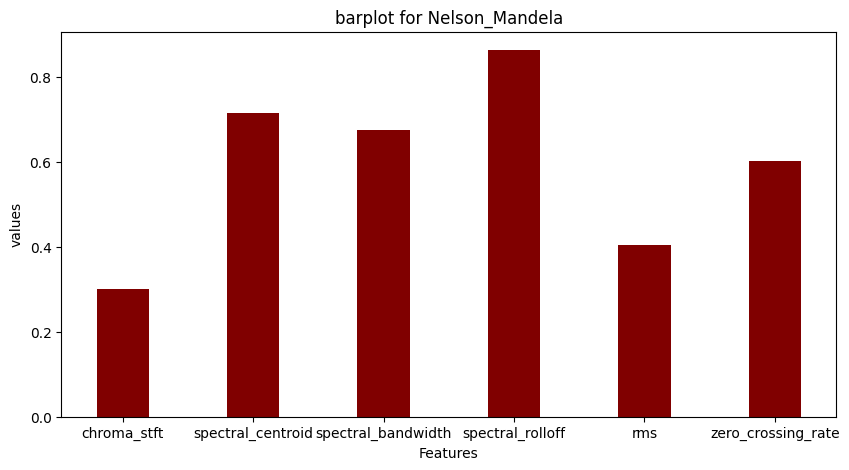

[0.3000404490390617, 0.7143777503177108, 0.6746518843991959, 0.8637088809541897, 0.4048780060325068, 0.6024807561919197]


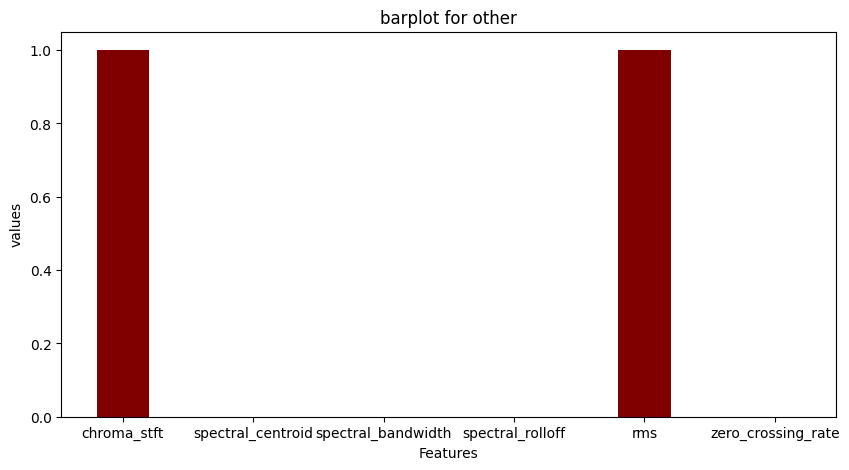

[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]


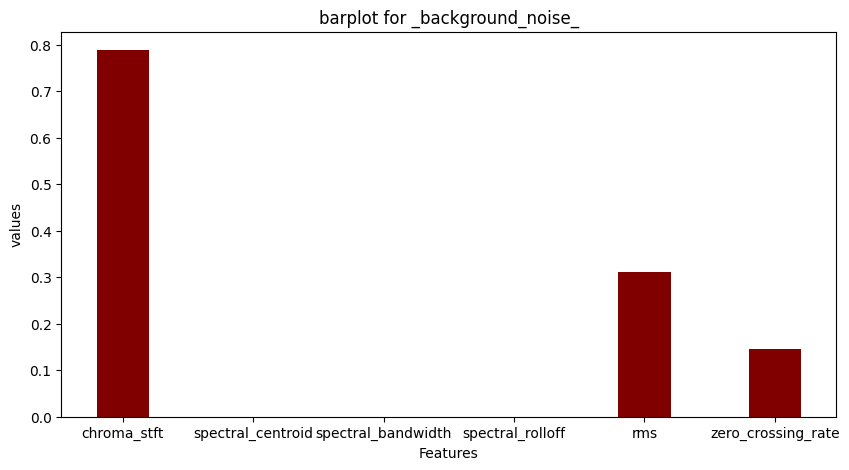

[0.7889079241053588, 0.0, 0.0, 0.0, 0.3114515108220512, 0.1460985711586414]


In [ ]:
norm_audios_feat = []
import os
# List of directories (speakers)
speakers = [dir for dir in os.listdir(dataset_directory) if dir != file_to_ignore]
for speaker in speakers:
    speaker_path = os.path.join(dataset_directory, speaker)
    audio_files = os.listdir(speaker_path)


    x = []
    count = 0
    avg_0,avg_1,avg_2,avg_3,avg_4,avg_5 = [],[],[],[],[],[]
    for audio_clip_file in audio_files:
        audio_clip_path = os.path.join(speaker_path, audio_clip_file)
        audio, sample_rate = librosa.load(audio_clip_path)


        feature_vector = get_feature_vector(audio,sample_rate)
        norm_audios_feat.append(feature_vector)

        avg_0.append(feature_vector[0])
        avg_1.append(feature_vector[1])
        avg_2.append(feature_vector[2])
        avg_3.append(feature_vector[3])
        avg_4.append(feature_vector[4])
        avg_5.append(feature_vector[5])



    avg_0 = np.array(avg_0)
    avg_1 = np.array(avg_1)
    avg_2 = np.array(avg_2)
    avg_3 = np.array(avg_3)
    avg_4 = np.array(avg_4)
    avg_5 = np.array(avg_5)
    range_to_normalize = (0,1)
    avg_0 = normalize(avg_0, range_to_normalize[0],range_to_normalize[1])
    avg_1 = normalize(avg_1, range_to_normalize[0],range_to_normalize[1])
    avg_2 = normalize(avg_2, range_to_normalize[0],range_to_normalize[1])
    avg_3 = normalize(avg_3, range_to_normalize[0],range_to_normalize[1])
    avg_4 = normalize(avg_4, range_to_normalize[0],range_to_normalize[1])
    avg_5 = normalize(avg_5, range_to_normalize[0],range_to_normalize[1])

    avg_0 = np.mean(avg_0)
    avg_1 = np.mean(avg_1)
    avg_2 = np.mean(avg_2)
    avg_3 = np.mean(avg_3)
    avg_4 = np.mean(avg_4)
    avg_5 = np.mean(avg_5)

    x = [avg_0, avg_1,avg_2,avg_3,avg_4,avg_5]

    fig = plt.figure(figsize = (10, 5))
    plt.bar(['chroma_stft','spectral_centroid','spectral_bandwidth','spectral_rolloff','rms','zero_crossing_rate'],x, color ='maroon', width = 0.4)
    plt.xlabel("Features")
    plt.ylabel("values")
    plt.title(f"barplot for {speaker}");
    plt.show()
    print(x)

Noise augmentation and Mel Spectogram

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kongaevans/speaker-recognition-dataset

 93% 214M/231M [00:01<00:00, 117MB/s]
100% 231M/231M [00:01<00:00, 126MB/s]


In [ ]:
! unzip speaker-recognition-dataset.zip

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import os
import numpy as np
import time
from PIL import Image
import librosa
# from librosa import output
import librosa.display
import math
import soundfile as sf

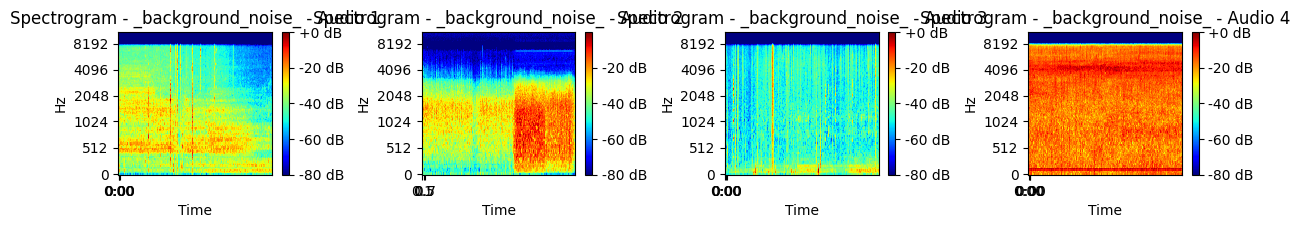

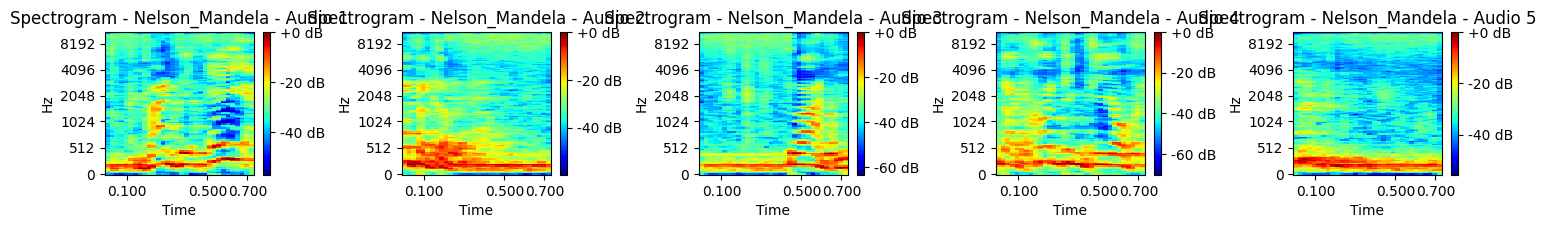

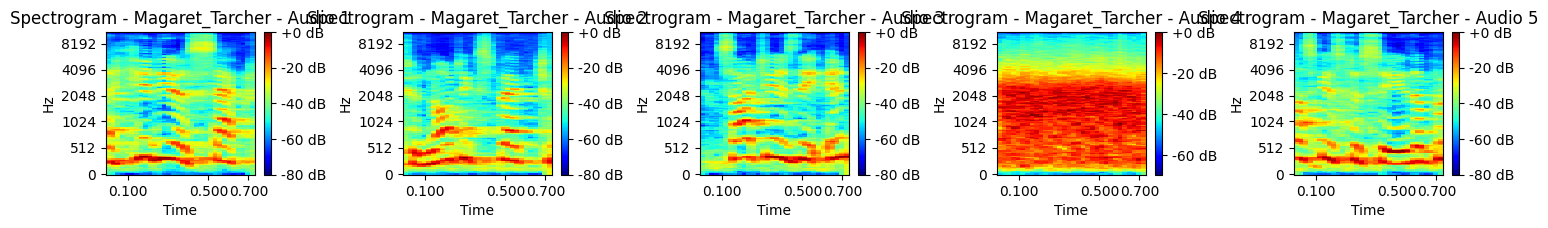

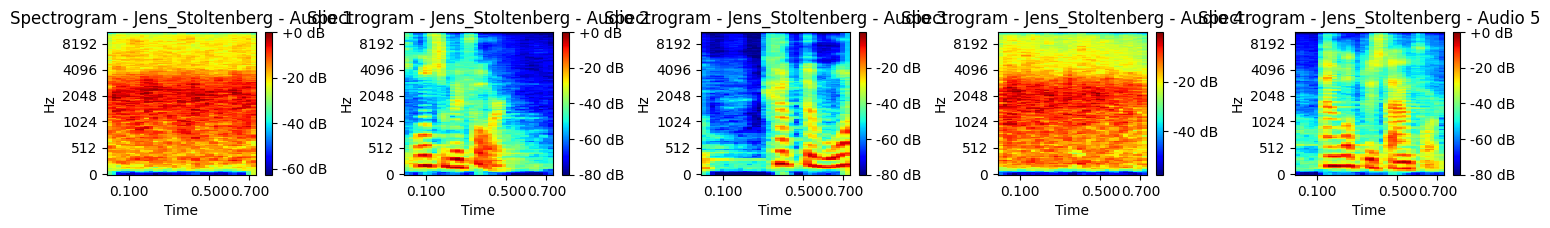

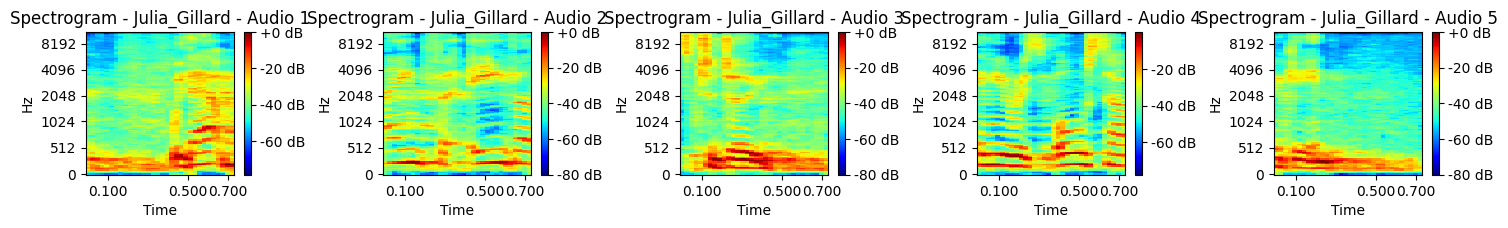

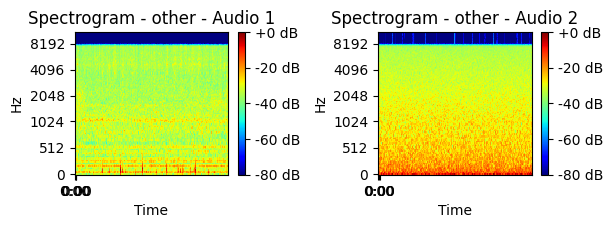

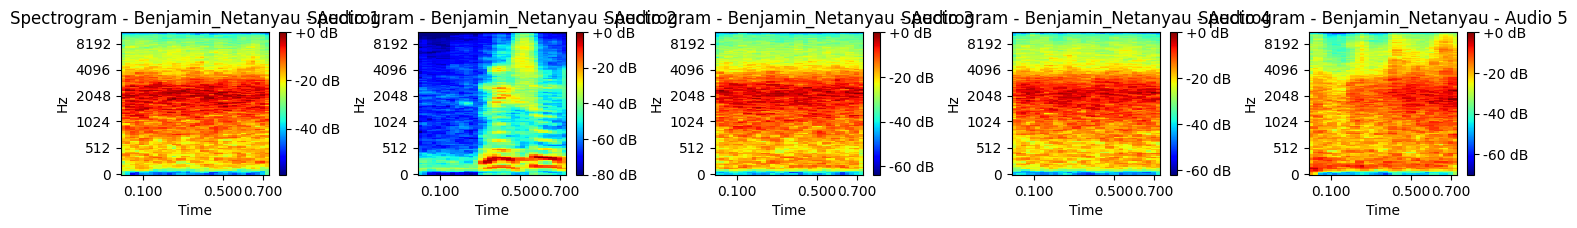

In [ ]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

data_dir = '16000_pcm_speeches'
all_audio_files = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            all_audio_files.append(os.path.join(root, file))

selected_audio_files = {}

for audio_file in all_audio_files:
    directory = os.path.dirname(audio_file)
    if directory not in selected_audio_files:
        selected_audio_files[directory] = []
    if len(selected_audio_files[directory]) < 5:
        selected_audio_files[directory].append(audio_file)

# Calculate the number of rows and columns for subplots
num_rows = len(selected_audio_files)
num_columns = 5

for directory, audio_files in selected_audio_files.items():
    i = 1
    plt.figure(figsize=(15, num_rows * 2))

    for audio_path in audio_files:
        audio, sr = librosa.load(audio_path, sr=None)
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

        plt.subplot(num_rows, num_columns, i)
        librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), x_axis='time', y_axis='mel', cmap='jet')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spectrogram - {os.path.basename(directory)} - Audio {i}")
        plt.xticks([0.1, 0.5, 0.7])

        i += 1

    plt.tight_layout()
    plt.show()


In [ ]:
! pip install pydub

In [ ]:
from pydub import AudioSegment
import os
import random

clean_audio_dirs = ["16000_pcm_speeches/Benjamin_Netanyau", "16000_pcm_speeches/Jens_Stoltenberg", "16000_pcm_speeches/Julia_Gillard", "16000_pcm_speeches/Margaret_Tarcher", "16000_pcm_speeches/Nelson_Mandela"]
noise_dirs = ["16000_pcm_speeches/_background_noise_", "16000_pcm_speeches/other"]

output_dir_with_noise = "output_with_noise"
output_dir_with_multiplied_noise = "output_with_multiplied_noise"

def add_noise(audio, noise):
    return audio.overlay(noise)

def multiply_noise(audio, noise):
    return audio * noise

os.makedirs(output_dir_with_noise, exist_ok=True)
os.makedirs(output_dir_with_multiplied_noise, exist_ok=True)

selected_audio_samples = random.sample(os.listdir(clean_audio_dirs[0]), 30)

for sample in selected_audio_samples:
    try:
      clean_audio = AudioSegment.from_file(os.path.join((clean_audio_dirs[0]), sample))
    except:
      try:
        clean_audio = AudioSegment.from_file(os.path.join((clean_audio_dirs[1]), sample))
      except:
        try:
          clean_audio = AudioSegment.from_file(os.path.join((clean_audio_dirs[2]), sample))
        except:
          try:
            clean_audio = AudioSegment.from_file(os.path.join((clean_audio_dirs[3]), sample))
          except:
            clean_audio = AudioSegment.from_file(os.path.join((clean_audio_dirs[4]), sample))

    noise_file = AudioSegment.from_file(os.path.join((noise_dirs[0]), random.choice(os.listdir(noise_dirs[0]))))

    if random.choice([True, False]):
        output_audio = add_noise(clean_audio, noise_file)
        output_audio.export(os.path.join(output_dir_with_noise, sample), format="wav")
    else:
        output_audio = multiply_noise(clean_audio, noise_file)
        output_audio.export(os.path.join(output_dir_with_multiplied_noise, sample), format="wav")


## Stft, chunking noise, adding noise to data

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kongaevans/speaker-recognition-dataset

 92% 213M/231M [00:01<00:00, 144MB/s]
100% 231M/231M [00:01<00:00, 134MB/s]


In [ ]:
! unzip speaker-recognition-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/556.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/557.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/558.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/559.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/56.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/560.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/561.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/562.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/563.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/564.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/565.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/566.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/567.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/568.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/569.wav  
  inflating: 16000_pcm_speeches/Jens_Stoltenberg/57.wav  
  infla

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.decomposition import PCA

In [ ]:
a,sr = librosa.load('./16000_pcm_speeches/_background_noise_/doing_the_dishes.wav',sr=None)
sr

22050

In [ ]:
audios = ['./16000_pcm_speeches/Benjamin_Netanyau',
              './16000_pcm_speeches/Jens_Stoltenberg',
              './16000_pcm_speeches/Julia_Gillard',
              './16000_pcm_speeches/Magaret_Tarcher',
              './16000_pcm_speeches/Nelson_Mandela']
noises = ['./16000_pcm_speeches/_background_noise_',
              './16000_pcm_speeches/other']

audio_le = LE()
audios_labels = audio_le.fit_transform(audios)
noise_le = LE()
noises_labels = noise_le.fit_transform(noises)

In [ ]:
audio_df = pd.DataFrame({'paths':audios})
sr = 16_000
audio_df['audios'] = audio_df['paths'].apply(lambda x:
    [librosa.load(os.path.join(x,f),sr=sr)[0] for f in os.listdir(x)]
)
noise_df = pd.DataFrame({'paths':noises})
noise_df['audios'] = noise_df['paths'].apply(lambda x:
    [librosa.load(os.path.join(x,f),sr=sr)[0] for f in os.listdir(x)]
)
audio_df['labels'] = audio_le.transform(audio_df['paths'])
noise_df['labels'] = noise_le.transform(noise_df['paths'])

In [ ]:
print("Audio class size",list(audio_df['audios'].apply(len)))
print("Average audio length",list(audio_df['audios'].apply(lambda x: np.mean([len(y)/sr for y in x]))))
print("Noise class size",list(noise_df['audios'].apply(len)))
print("Average noise length",np.mean(noise_df['audios'].apply(lambda x: np.mean([len(y)/sr for y in x]))))

Audio class size [1500, 1500, 1501, 1500, 1500]
Average audio length [1.0, 1.0, 1.0, 1.0, 1.0]
Noise class size [4, 2]
Average noise length 59.61815625


In [ ]:
concat_noise = []
for i in range(len(noise_df)):
    concat_noise.extend(np.concatenate(noise_df['audios'].iloc[i]))
concat_noise = np.array(concat_noise)
print("Concatenated noise shape",concat_noise.shape)
chunk_len = sr
chunked_noise = []
for i in range(0,len(concat_noise)-chunk_len,chunk_len):
    chunked_noise.append(concat_noise[i:i+chunk_len])
chunked_noise = np.array(chunked_noise)
print("Noise shape",chunked_noise.shape)

Concatenated noise shape (5691061,)
Noise shape (355, 16000)


In [ ]:
X = []
y = []
for i in range(len(audio_df)):
    for j in range(len(audio_df['audios'].iloc[i])):
        X.append(audio_df['audios'].iloc[i][j])
        y.append(audio_df['labels'].iloc[i])

In [ ]:
aug_len = len(X)//5
n = len(X)
for _ in range(aug_len):
    i = np.random.randint(n)
    j = np.random.randint(len(chunked_noise))
    if np.random.random() < 0.5:
        aug_X = X[i] + 0.25*chunked_noise[j]
    else:
        aug_X = X[i]*chunked_noise[j]
    X.append(aug_X)
    y.append(y[i])

X = np.array(X)
y = np.array(y)

In [ ]:
print("X (Audio) shape",X.shape)
print("y (label) shape",y.shape)

X (Audio) shape (9001, 16000)
y (label) shape (9001,)


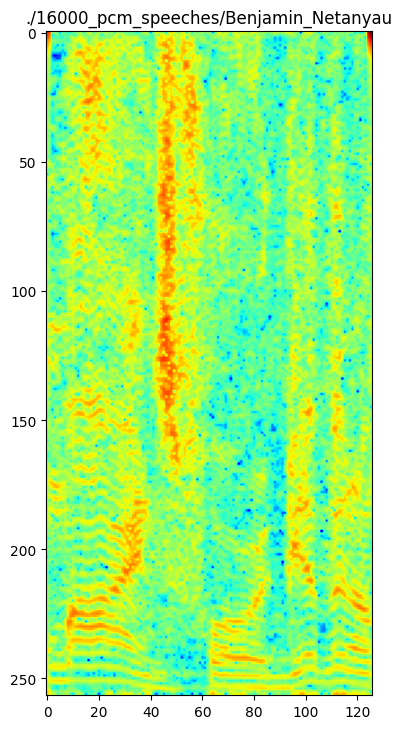

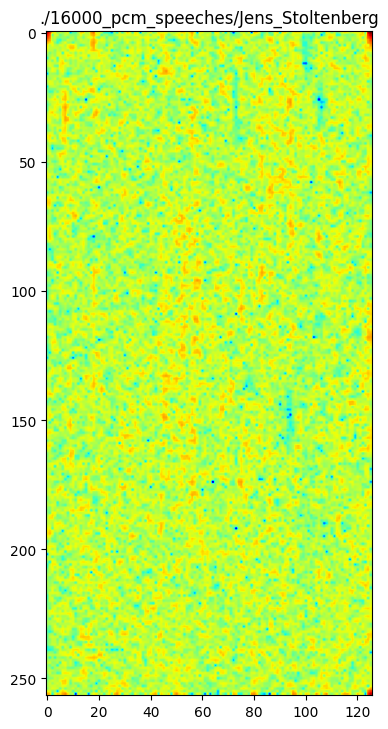

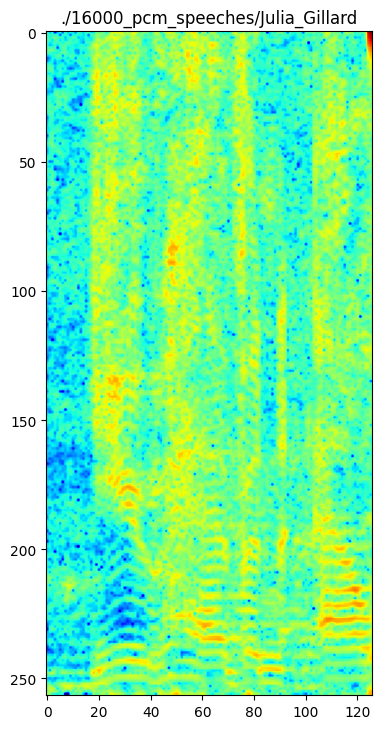

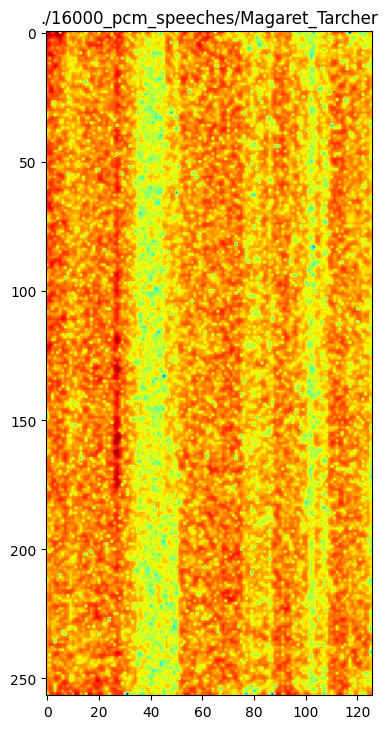

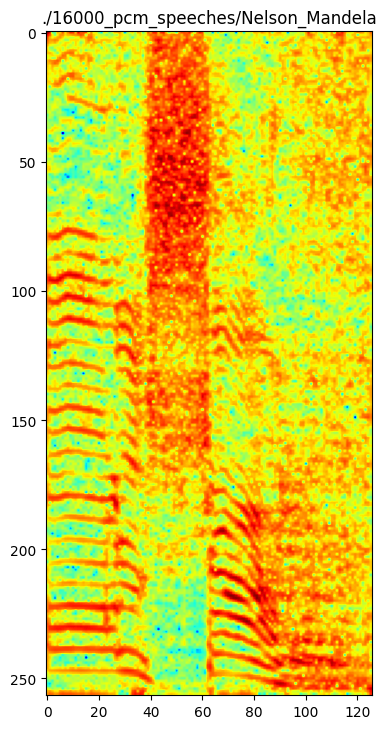

In [ ]:
for s in range(max(y)+1):
    #increase figsize
    plt.figure(figsize=(50,50))
    plt.subplot(max(y)+1,1,s+1)
    speakers = X[y==s]
    spek = speakers[np.random.randint(len(speakers))]
    stft_X = np.abs(librosa.stft(y=spek,n_fft=512))**2
    stft_X = np.flip(stft_X,axis=0)
    plt.imshow(np.log(stft_X) - np.log(stft_X).mean(axis=-1,keepdims=True),cmap='jet')
    plt.title(audio_le.inverse_transform([s])[0])

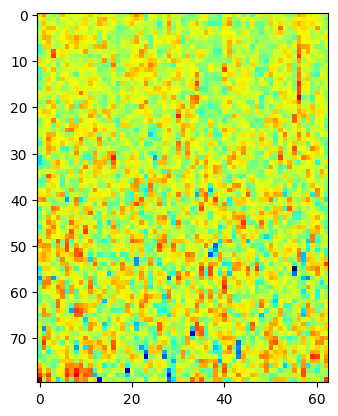

In [ ]:
spec_X = librosa.feature.melspectrogram(y=X[0],sr=sr,n_fft=512,hop_length=256,n_mels=80)
spec_X = np.flip(spec_X,axis=0)
plt.imshow(np.log(spec_X+1e-7)-np.log(spec_X+1e-7).mean(axis=-1,keepdims=True),cmap='jet')
plt.show()

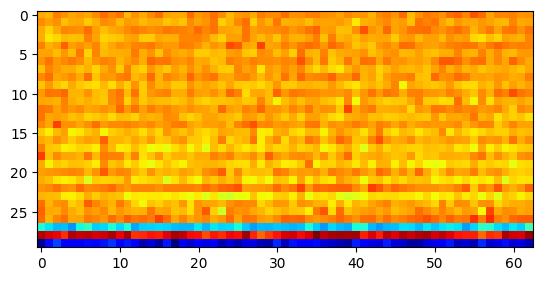

In [ ]:
mfcc_X = librosa.feature.mfcc(y=X[0],sr=sr,n_fft=512,hop_length=256,n_mfcc=30)
mfcc_X = np.flip(mfcc_X,axis=0)
plt.imshow(mfcc_X, cmap='jet')
plt.show()

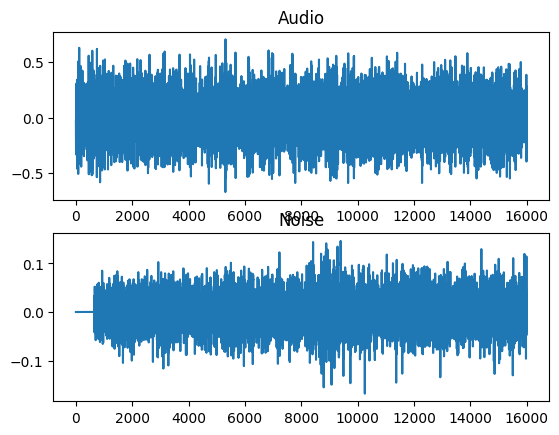

In [ ]:
plt.subplot(2,1,1)
plt.plot(np.arange(sr),X[0])
plt.title("Audio")
plt.subplot(2,1,2)
plt.plot(np.arange(chunk_len),chunked_noise[0])
plt.title("Noise")
plt.show()

In [ ]:
features = librosa.feature.mfcc(y=X,sr=sr,n_fft=512,hop_length=256,n_mfcc=30)
features = features.reshape((features.shape[0],-1))
print("Features shape",features.shape)

Features shape (9001, 1890)


In [ ]:
pca = PCA(n_components=250)
features_pca = pca.fit_transform(features)
pca.explained_variance_ratio_.sum()

0.95098865